In [1]:
#import user modules
#--- MATPLOTLIB
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.markers import MarkerStyle
from matplotlib.gridspec import GridSpec
import matplotlib.colors as mcolors
import seaborn as sns
import pandas as pd

import sys
my_path = "../../Python/"
if my_path not in sys.path:
    sys.path.append(my_path)
 
for place in sys.path: 
    print(place)

from tools import *
from fit_funcs import *
from entropy import *
import costfun.costfun as cost
import utils.figures as fig_help
from RandomMatrixTheory import goe
import utils.tools as tools

import importlib as imp
def reload_modules():
    imp.reload(cost)
    imp.reload(fig_help)

import itertools
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
latex_engine = 'xelatex'
latex_elements = {'preamble':r'\usepackage{physics}'}

%matplotlib inline
colors_ls = (list(mcolors.TABLEAU_COLORS)[:200])
colors_ls_cyc = itertools.cycle(colors_ls)

markers_ls = ['o','s','v', 'D', '<', 'X', '^', '*', '+']
markers = itertools.cycle(markers_ls)

linestyle_ls = ['-','--',':', '-.']
linestyle = itertools.cycle(linestyle_ls)

#--- NUMERICAL LIBS
import numpy as np
import itertools
import math
import random
from cmath import nan
import h5py   


# SCIPY LIBS
import scipy.stats as statistics
from scipy.special import binom
from scipy.special import erfinv
from scipy.special import digamma
from scipy.special import polygamma
from scipy.special import lambertw
from scipy.optimize import curve_fit as fit
from scipy.signal import savgol_filter
from scipy import integrate
from scipy import fft
 
# OTHER
import warnings
warnings.filterwarnings('ignore')
from joblib import Parallel, delayed
import copy
import os
from os import sep as kPSep
from os.path import exists

base_dir = "../results/PBC/"

print(base_dir[2:])
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

/Users/rafal.swietek/Projects/CODES/QHamSolver/TIFP/Jupyter_Python
/Users/rafal.swietek/opt/anaconda3/lib/python39.zip
/Users/rafal.swietek/opt/anaconda3/lib/python3.9
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/lib-dynload

/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/aeosa
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/locket-0.2.1-py3.9.egg
/Users/rafal.swietek/opt/anaconda3/lib/python3.9/site-packages/IPython/extensions
/Users/rafal.swietek/.ipython
../../Python/
/results/PBC/


## TEST

0.2 0.2 0.38518414639468246 0.7432945749917799 []
0.2 0.5 0.3853097782827087 0.7392655932889234 []
../results/PBC/Entropy/Eigenstate/_L=18,J=0.2,c=0.9,zz=-1,z1=-1.hdf5
0.4 0.2 0.3840281577660392 0.731295918889274 []
0.4 0.5 0.3830609364705435 0.7274656842118816 []
0.4 0.9 0.3831948970211245 0.722279245992929 []
0.6 0.2 0.38889292868742187 0.7263853456575933 []
0.6 0.5 0.3854821453478999 0.7213739920105546 []
0.6 0.9 0.387712267009882 0.717663389859722 []


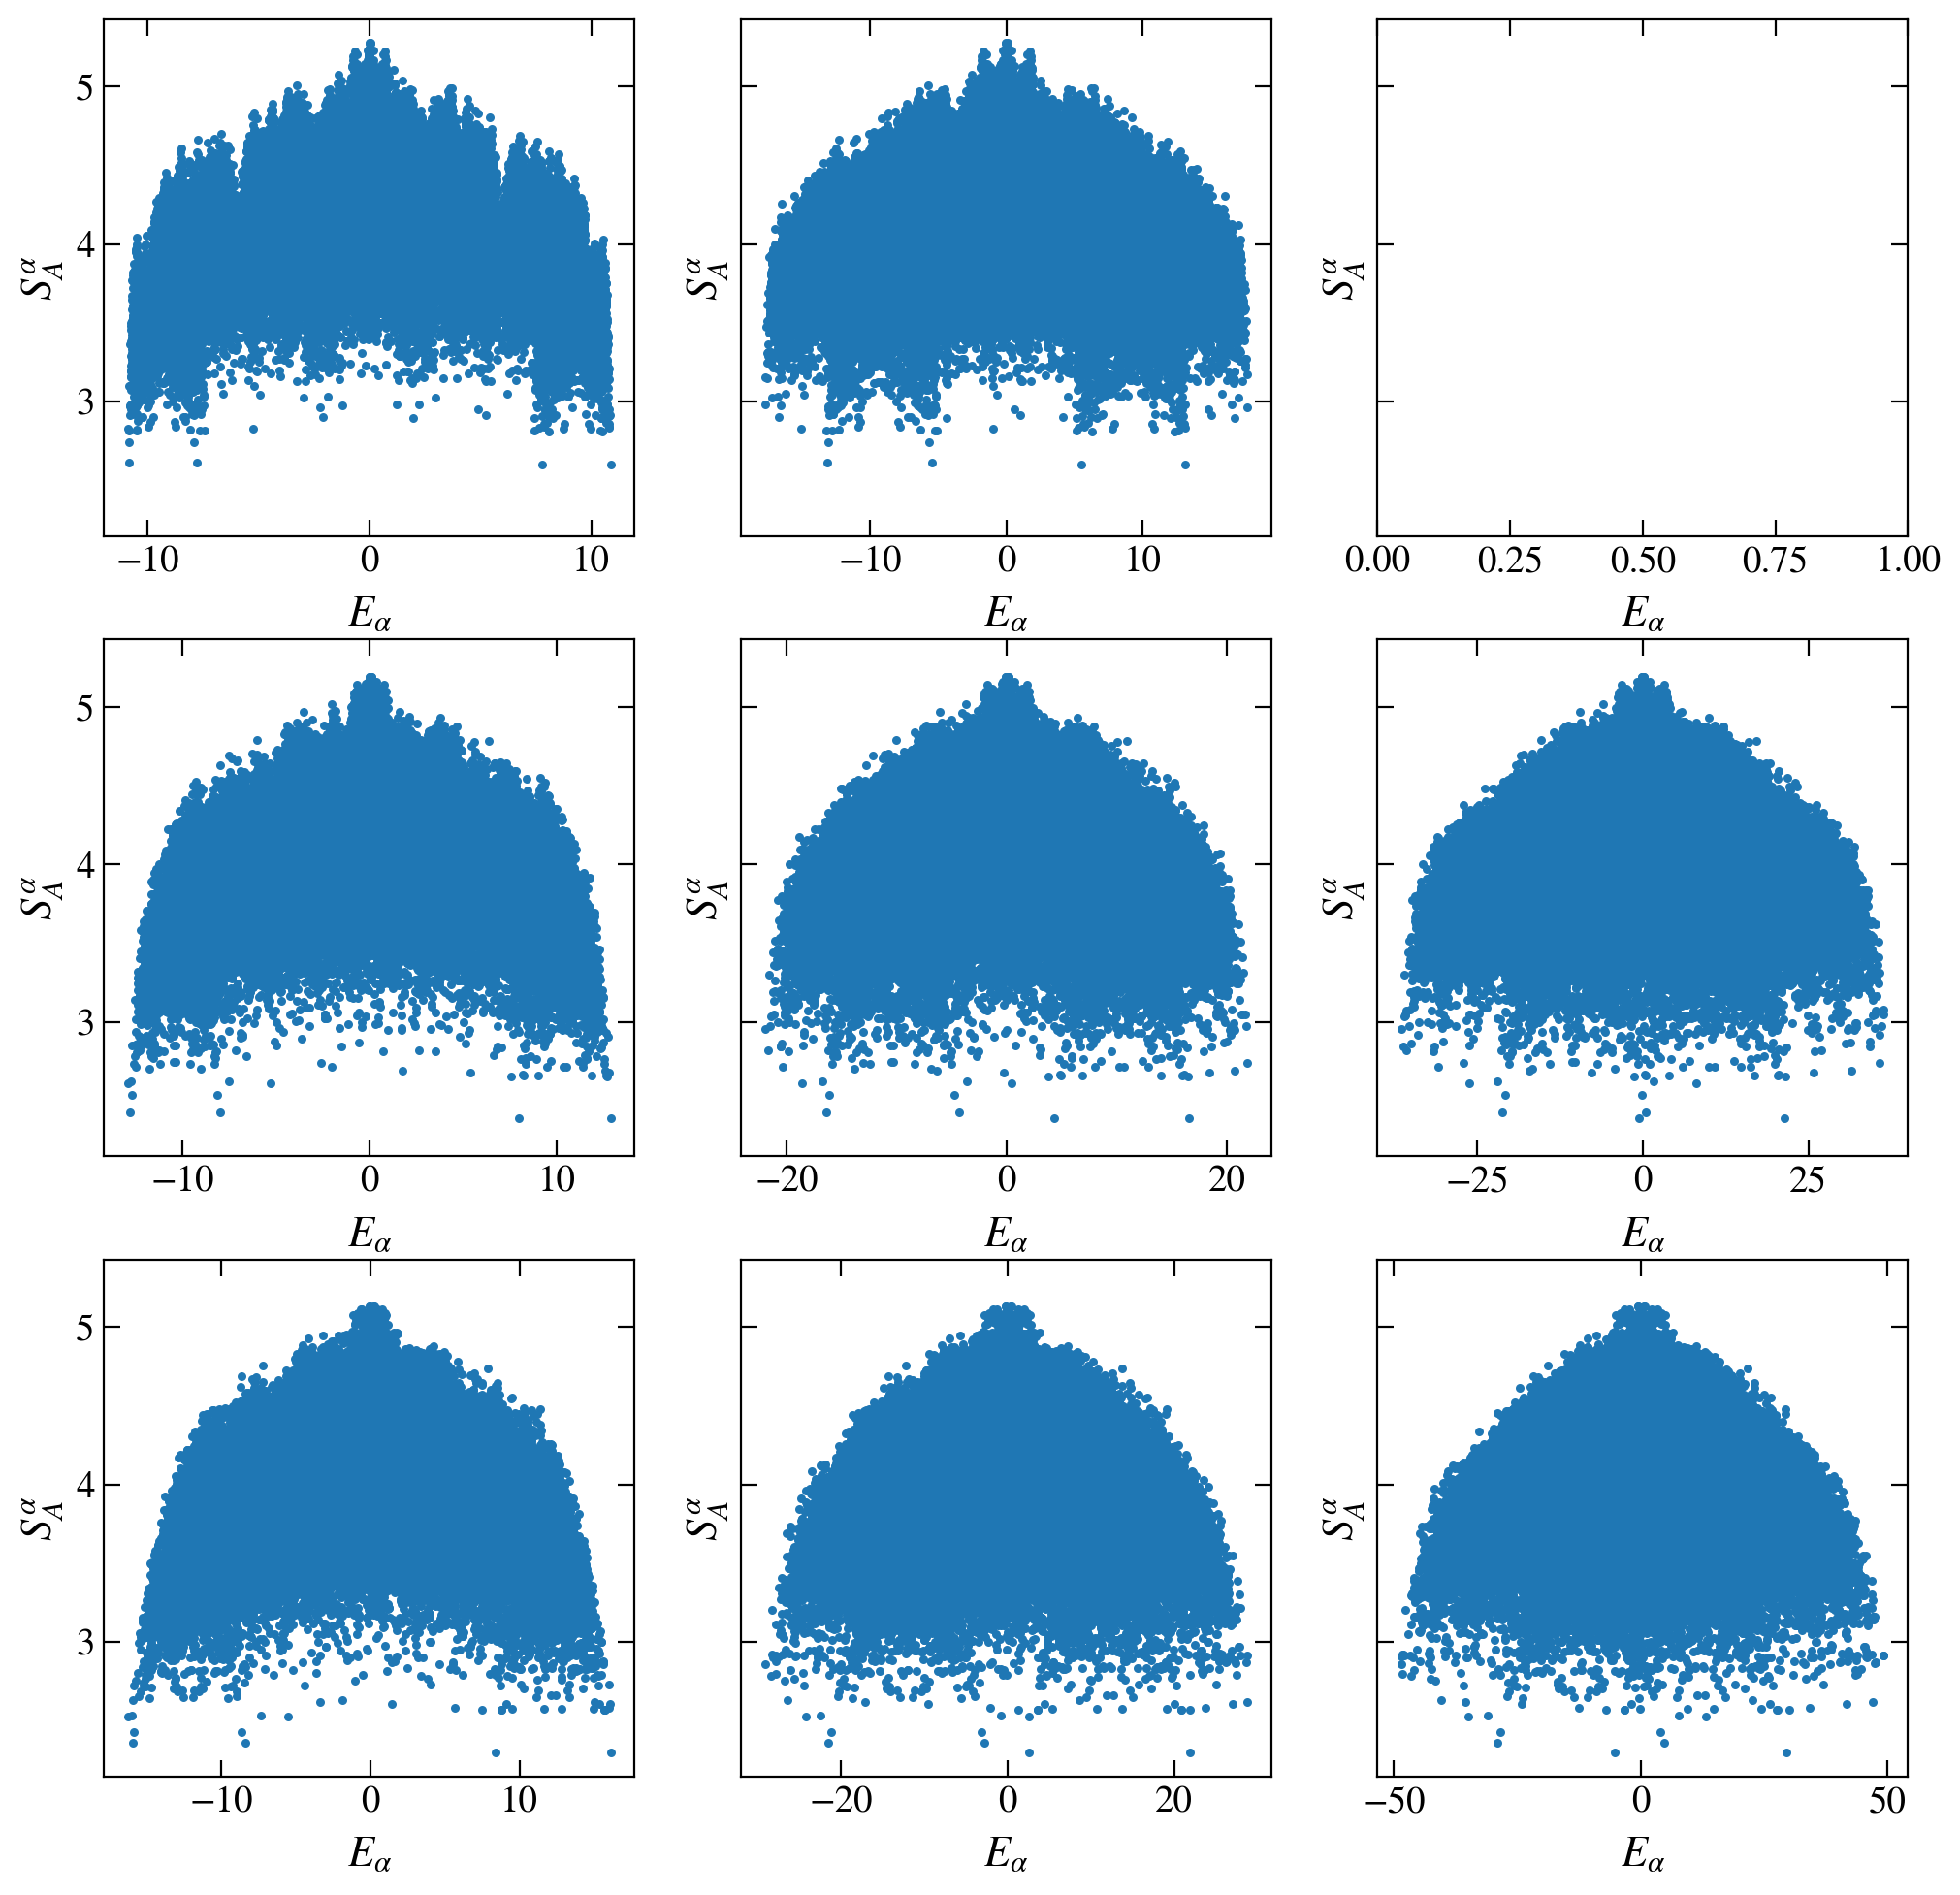

In [12]:
L=18
J=0.1
c=0.1
zz=-1
z1=-1
z2=-1

LA = L//2


fig, axes = plt.subplots( nrows=3, ncols=3, figsize=(12,12), dpi = 200, sharey=True)
axes = axes.flatten()
# for L in
params = [[J, c] for J in [0.2, 0.4, 0.6] for c in [0.2, 0.5, 0.9]]

for ii_pl, [J, c] in enumerate(params):
    axis = axes[ii_pl]
    name = base_dir + 'Entropy/Eigenstate/' + info(L=L, J=J, c=c, zz=zz, z1=z1, z2=z2, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('energies'))[0]
            _, indices, counts = np.unique(np.round(E, 14), return_index=True, return_counts=True)
            # print(L, zz, z1, z2, counts[counts > 1], E[ indices[counts>1] ])
            dim = E.size
            S = np.array(file.get('entropy'))[LA]
            axis.scatter(E, S, s=5)
            
            gaps = np.array(np.diff(E))[dim//4 : 3*dim//4]

            # print(gaps[:-1], gaps[1:])
            # print(gaps[np.abs(gaps) < 1e-14])
            ratio_tmp = np.minimum(gaps[:-1], gaps[1:]) / np.maximum(gaps[:-1], gaps[1:])
            print(J, c, np.mean(ratio_tmp), np.mean(S[dim//4 : 3*dim//4]) / page(L//2, L//2), counts[counts > 1])
            # print()
    else:
        print(name)

    fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha$", font_size=14, set_legend=False)

In [84]:
L=13
J=0.6
c=0.9
zz=1
r=1

sizes = np.arange(10, 19, 1)

for L in sizes:
    Z1_sec = [-1, 1] if L % 2==0 else [1]
    Z2_sec = [-1, 1] if L % 4==0 else [1]
    for zz in [-1, 1]:
        for z1 in Z1_sec:
            for z2 in Z2_sec:
                name = base_dir + 'Entropy/Eigenstate/' + info(L=L, J=J, c=c, zz=zz, z1=z1, z2=z2, ext='.hdf5')
                if exists(name):
                    with h5py.File(name, "r") as file:
                        E = np.array(file.get('energies'))[0]
                        _, indices, counts = np.unique(np.round(E, 14), return_index=True, return_counts=True)
                        counts = counts[counts > 1]
                        if len(counts) > 0:
                            print(L, zz, z1, z2, "Degenerate size = ", len(counts))
                else:
                    print(name)


12 1 1 -1 Degenerate size =  1
12 1 1 1 Degenerate size =  1
16 1 1 1 Degenerate size =  28
../results/symmetries/PBC/Entropy/Eigenstate/_L=17,J=0.6,c=0.9,zz=-1.hdf5
../results/symmetries/PBC/Entropy/Eigenstate/_L=17,J=0.6,c=0.9,zz=1.hdf5
../results/symmetries/PBC/Entropy/Eigenstate/_L=18,J=0.6,c=0.9,zz=-1,z1=-1.hdf5
../results/symmetries/PBC/Entropy/Eigenstate/_L=18,J=0.6,c=0.9,zz=-1,z1=1.hdf5
../results/symmetries/PBC/Entropy/Eigenstate/_L=18,J=0.6,c=0.9,zz=1,z1=-1.hdf5
../results/symmetries/PBC/Entropy/Eigenstate/_L=18,J=0.6,c=0.9,zz=1,z1=1.hdf5


## SAVER & PLOTTER

In [2]:
def get_sectors(L):
    zz_secs = [-1, 1]
    z1_secs = [-1, 1] if L % 2 == 0 else [1]
    z2_secs = [-1, 1] if L % 4 == 0 else [1]
    return [[zz, z1, z2] for zz in zz_secs for z1 in z1_secs for z2 in z2_secs]

In [19]:

L=16

J=1.0
c=0.2

sizes = np.arange(10,19,1)
sizes = [17]

def typical(data):
    data = np.array(data)
    return np.exp(np.mean(np.log(data)))

bucket_size = 20


params = [[J, c] for J in [0.2, 0.4, 0.6, 0.8] for c in [0.2, 0.4, 0.5, 0.7, 0.9]]
params = [[J, c] for J in [0.8] for c in [0.9]]

nu = 0.2
for nu in [500, 0.2, 0.5, 1.0]:
    frac = lambda dim: int(nu * dim) if nu <= 1.0 else nu

    folder = f'./RESULTS/nu={nu}/'
    os.makedirs(folder, exist_ok=True)
    os.makedirs(folder + 'Entropy/', exist_ok=True)

    for [J,c] in params:
        for L in sizes:
            LAA = np.arange(0, L//2+1, 1)

            entropy = np.zeros((LAA.size))
            entropy_degen = np.zeros((LAA.size))
            entropy_all = np.zeros((LAA.size))

            entropy_mov_av = np.zeros((LAA.size))
            entropy_mov_av_degen = np.zeros((LAA.size))
            entropy_mov_av_all = np.zeros((LAA.size))

            entropy2 = np.zeros((LAA.size))
            entropy2_all = np.zeros((LAA.size))
            entropy2_degen = np.zeros((LAA.size))
            
            entropy_var = np.zeros((LAA.size))
            entropy_var_all = np.zeros((LAA.size))
            entropy_var_degen = np.zeros((LAA.size))

            entropy_typ = np.zeros((LAA.size))
            
            sects = get_sectors(L)

            
            dim_tot = 0
            dim_tot_deg = 0
            dim_tot_nondeg = 0
            Stot = []
            for [zz, z1, z2] in sects:
                
                name = base_dir + 'Entropy/Eigenstate/' + info(L=L, J=J, c=c, zz=zz, z1=z1, z2=z2, ext='.hdf5')
                if exists(name):
                    with h5py.File(name, "r") as file:
                        try:
                            energies = np.array(file.get('energies')[0])
                            dim = energies.size
                            energies = np.round(energies, 14)
                            bucket_size = 20 if dim < 1000 else 100
                            
                            _, indices, counts = np.unique(energies, return_index=True, return_counts=True)
                            non_deg_idx = []
                            deg_idx = []
                            for new_iii, idx in enumerate(indices):
                                if counts[new_iii] == 1:
                                    for _ in range(counts[new_iii]):
                                        non_deg_idx.append(idx)
                                else:
                                    for _ in range(counts[new_iii]):
                                        deg_idx.append(idx)
                                        idx += 1

                            # if len(non_deg_idx) != dim:
                            #     print(L, d1, e1, "Degeneracies! Number = ", dim - len(non_deg_idx), "Rank = ", max(counts))
                            
                            entropies = np.array(file.get('entropy'))
                            if entropies.shape != ():
                                
                                dim_tot += dim

                                num = frac(dim)

                                E_av = np.mean(energies)
                                index_meanE = min(range(len(energies)), key=lambda i: abs(energies[i] - E_av))
                                
                                my_min = int(index_meanE - num / 2)
                                if my_min < 0 or num == dim: my_min = 0;  

                                my_max = int(index_meanE + num / 2)
                                if my_max >= dim or num == dim: my_max = dim
                                # print(L, ks, ps, zxs, zzs, np.intersect1d(deg_idx, np.arange(my_min, my_max+1)))
                                for LA in LAA:
                                    # NON-DEGENERATE
                                    if len(non_deg_idx) > 0:
                                        sample = entropies[LA]
                                        valid_idx = non_deg_idx
                                        if num < dim and my_min > 0 and my_max < dim:
                                            valid_idx = np.intersect1d(valid_idx, np.arange(my_min, my_max+1))
                                            
                                        if len(valid_idx) > 0 and sample.size > 0:
                                            if LA == LAA[0]: dim_tot_nondeg += dim

                                            entropy[LA] += dim * np.mean(sample[valid_idx])
                                        
                                            sample = tools.get_fluctuations(sample, bucket_size=bucket_size)    #[bucket_size // 2 : -bucket_size // 2]
                                            sample = sample[valid_idx]
                                            entropy_mov_av[LA] += dim * np.mean(sample)
                                            entropy2[LA] += dim * np.mean(sample**2)
                                            # entropy_var[LA] += dim * np.var(sample) if ks == 0 or (ks == L // 2 and L%2==0) else 2 * dim * np.var(sample)

                                    # DEGENERATE
                                    if len(deg_idx) > 0:
                                        sample = entropies[LA]
                                        valid_idx = deg_idx
                                        if num < dim and my_min > 0 and my_max < dim:
                                            valid_idx = np.intersect1d(valid_idx, np.arange(my_min, my_max+1))

                                        if len(valid_idx) > 0 and sample.size > 0:
                                            if LA == LAA[0]: dim_tot_deg += dim

                                            entropy_degen[LA] += dim * np.mean(sample[valid_idx])
                                        
                                            sample = tools.get_fluctuations(sample, bucket_size=bucket_size)#[bucket_size // 2 : -bucket_size // 2]
                                            sample = sample[valid_idx]
                                            entropy_mov_av_degen[LA] += dim * np.mean(sample)
                                            entropy2_degen[LA] += dim * np.mean(sample**2)

                                    # ALL
                                    sample = entropies[LA]
                                    if num < dim and my_min > 0 and my_max < dim:
                                        sample = sample[my_min : my_max+1]
                                    if sample.size > 0:
                                        entropy_all[LA] += dim * np.mean(sample)

                                    sample = entropies[LA]
                                    sample = tools.get_fluctuations(sample, bucket_size=bucket_size)    #[bucket_size // 2 : -bucket_size // 2]
                                    
                                    entropy_mov_av_all[LA] += dim * np.mean(sample)
                                    entropy2_all[LA] += dim * np.mean(sample**2)
                            else:
                                print("File corrupt, no entropies:", name)
                        except TypeError:
                            print("File corrupt, no energies:", name)
                else:
                    print("Not found:", name)
            if dim_tot != 2**L:
                print("waaaaaaa", dim_tot, 2**L)
            
            # entropy_var[LA] = np.var(np.array(Stot))
            # entropy_typ[LA] = typical(np.array(Stot))
            # entropy[ii] = np.mean(np.array(Stot))
            if dim_tot > 0: 
                entropy /= dim_tot_nondeg
                entropy_mov_av /= dim_tot_nondeg
                entropy_var = entropy2 / dim_tot_nondeg - (entropy_mov_av)**2

                entropy_all /= dim_tot
                entropy_mov_av_all /= dim_tot
                entropy_var_all = entropy2_all / dim_tot - (entropy_mov_av_all)**2

                entropy_degen /= dim_tot_deg
                entropy_mov_av_degen /= dim_tot_deg
                entropy_var_degen = entropy2_degen / dim_tot_deg - (entropy_mov_av_degen)**2

            data = {'subsizes': LAA, '<S>': entropy, '<S^2>': entropy_var, '<S>_typ': entropy_typ, 
                        '<S>_deg': entropy_degen, '<S>_all': entropy_all,
                        '<S^2>_deg': entropy_var_degen, '<S^2>_all': entropy_var_all}

            df = pd.DataFrame(data=data)
            
            print(L, J, c)
            print(df) 
            df.to_csv(f'./RESULTS/nu={nu}/Entropy/_L={L},J={J},c={c}.csv')

17 0.8 0.9
   subsizes           <S>         <S^2>  <S>_typ  <S>_deg       <S>_all  \
0         0 -2.329341e-14  1.709441e-27      0.0      NaN -2.329341e-14   
1         1  6.927382e-01  8.375000e-06      0.0      NaN  6.927382e-01   
2         2  1.376167e+00  1.358463e-04      0.0      NaN  1.376167e+00   
3         3  2.009858e+00  2.856048e-03      0.0      NaN  2.009858e+00   
4         4  2.592536e+00  1.236237e-02      0.0      NaN  2.592536e+00   
5         5  3.099401e+00  3.277810e-02      0.0      NaN  3.099401e+00   
6         6  3.511536e+00  6.544808e-02      0.0      NaN  3.511536e+00   
7         7  3.807958e+00  1.060532e-01      0.0      NaN  3.807958e+00   
8         8  3.970188e+00  1.398721e-01      0.0      NaN  3.970188e+00   

   <S^2>_deg     <S^2>_all  
0        NaN  1.804994e-27  
1        NaN  9.285100e-06  
2        NaN  1.813858e-04  
3        NaN  2.808050e-03  
4        NaN  1.153172e-02  
5        NaN  2.840359e-02  
6        NaN  5.454767e-02  
7     

In [3]:


L=16

J=0.2
c=0.2

def plottt(axis, J=0.2, c=0.2, label = "", frac = lambda dim: dim+1, moment = 'mean', nu = None, size = 30):
    """
    Moment -> 'mean', 'var', 'typ'
    """
    col = next(colors_ls_cyc)
    
    if nu is None:
        nu = 1.0 if frac(10) >= 10 else (int(frac(0)) if frac(1000) == frac(10) else "%.2f"%(frac(100) / 100))
    
    # sizes = sizes_even
    sizes_even = np.arange(10,19,4)
    sizes_odd = np.arange(11,19,2)
    for ijkl, sizes in enumerate([sizes_even, sizes_odd]):
    # for ijkl, sizes in enumerate([sizes_odd]):

        entropy = np.zeros((sizes.size))
        entropy_var = np.zeros((sizes.size))
        entropy_typ = np.zeros((sizes.size))
        LAA = (sizes / 2).astype(int)
        
        for ii, L in enumerate(sizes):
            LA = L // 2
            name = f'./RESULTS/nu={nu}/Entropy/_L={L},J={J},c={c}.csv'
            if exists(name):
                df = pd.read_csv(name)
                entropy[ii] = np.array(df['<S>'])[LA]
                entropy_var[ii] = np.array(df['<S^2>'])[LA]
                entropy_typ[ii] = np.array(df['<S>_typ'])[LA]
                
            else:
                print("Failed to find", name)  
                
        if moment == 'var':

            xx = 1./(LAA) #page_var(LAA, sizes - LAA)
            # xx = 1. / sizes
            
            yy = ( np.sqrt(entropy_var) / (LAA * np.log(2)) )  #page_var(LAA, sizes - LAA)
            # print(entropy_var, yy)
            
            def new_fit(x, a, b):
                return a * x**0.5 + b * x**1
            
            pars, pconv = fit(new_fit,
                            xdata = xx,
                            ydata = yy)
            
            xval = np.linspace(0, max(xx)*1.2, 100)
            
            alfa = 0.5
            axis.plot(xval**alfa, new_fit(xval, *pars), ls=':' if ijkl else '--', color=col)

            if ijkl:        axis.scatter(xx**alfa, yy, marker='s', s=size, color = col)
            else:           axis.scatter(xx**alfa, yy, marker='o', s=size, color = col, label=label)
            
            # axis.plot(xval**alfa, xval**alfa/5, ls=':', color='k')
            print(nu, moment, "INTEGRABLE", J, c, pars)
            axis.set_ylim(0, 0.12)
            axis.set_xlim( min(xval**alfa), max(xval**alfa) )
        elif moment == 'mean':
            # print(sizes_even, entropy)
            xx = 1.0 / (LAA).astype(float)# page( LAA, sizes - LAA)
            # xx = 1.0 / (sizes).astype(float)# page( LAA, sizes - LAA)

            yy = entropy / (LAA * np.log(2)) #page( LAA, sizes - LAA)

        
            pars, pconv = fit(lin_fit2,
                            xdata = xx,
                            ydata = yy)
            print(L, J, c, pars)
            xval = np.linspace(0, max(xx)*1.1, 100)
            axis.plot(xval, lin_fit2(xval, *pars), ls=':' if ijkl else '--', color=col)
            if ijkl:        axis.scatter(xx, yy, marker='s', s=size, color = col, label=label)
            else:           axis.scatter(xx, yy, marker='o', s=size, color = col)
            
            axis.set_xlim(0, 1.1 * max(xx))
            # axis.set_ylim(0.53, 0.69)
        
        elif moment == 'typ':
            xx = 1. / LAA

            yy = entropy_typ / entropy # / page( LAA, sizes - LAA)

            pars, pconv = fit(lin_fit2,
                            xdata = xx,
                            ydata = yy)
            print(L, d1, e1, pars)
            xval = np.linspace(0, max(xx), 100)
            axis.plot(xval, lin_fit2(xval, *pars), ls=':' if ijkl else '--', color=col)
            if ijkl:        axis.scatter(xx, yy, marker='s', s=size, color = col)
            else:           axis.scatter(xx, yy, marker='o', s=size, color = col, label=label)
        

            axis.set_xlim(0, None)
        # axis.set_ylim(None, 1.0)
        else: 
            raise ValueError("No moment chosen! Take mean, var or typ for calculation")

## XXZ and XYZ plotter

In [8]:
def info_maks(L, J1=0, J2=0, delta1=0, delta2=0, eta1=0, eta2=0, hx=0, hz=0, k=0, p=1, zx=1, zz=1, U1=1):
    arr = [J1, J2, hx, hz, delta1, delta2, eta1, eta2]
    names = ['Ja', 'Jb','hx', 'hz', 'dA', 'dB', 'eA', 'eB']
    
    info = ",xyz,Ns=%d"%L
    for i, var in enumerate(arr):
        info += str(",%s={:.%df}"%(names[i], 3)).format(round(var, 3))
    
    info += ',pb=0'
    
    zz = -1 if U1%2 else 1
    if k == 0 or (k == L/2):
        arr = [k, zx, zz, p] if U1 == L / 2 else [k, zz, p]
        names = ['T', 'PX', 'PZ', 'R'] if U1 == L / 2 else ['T', 'PZ', 'R']
    else:
        arr = [k, zx, zz] if U1 == L / 2 else [k, zz]
        names = ['T', 'PX', 'PZ'] if U1 == L / 2 else ['T', 'PZ']
    for i, var in enumerate(arr):
        info += ",%s=%d"%(names[i], var)
    return info + ",U1=%.2f,BC=0"%U1


def info_base(L, J1=0, J2=0, delta1=0, delta2=0, eta1=0, eta2=0, hx=0, hz=0):
    """
    Main body of file names with model parameters as input
    """
    arr = [J1, J2, delta1, delta2, eta1, eta2, hx, hz]
    names = ['J1', 'J2','d1', 'd2', 'e1', 'e2', 'hx', 'hz']
    info = "_L=%d"%L
    for i, var in enumerate(arr):
        n = order_of_magnitude(var)
        info += str(",%s={:.%df}"%(names[i], n)).format(round(var, n))
    return info


def info_sym(L, J1=0, J2=0, delta1=0, delta2=0, eta1=0, eta2=0, hx=0, hz=0, k=0, p=1, zx=1, zz=1, edge = False, BOUNDARY_COND = 'PBC'):
    """
    Main body of file names with model parameters as input for symmetric model with symmetry sectors as input
    """
    info = info_base(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz)
    if BOUNDARY_COND == 'PBC':                          info += ",k=%d"%k
    if BOUNDARY_COND == 'OBC' or (k==0 or k==L/2):      info += ",p=%d"%p
    if hz == 0 and not edge and (L % 2 == 0 or hx != 0):info += ",zx=%d"%zx
    if hx == 0:                                         info += ",zz=%d"%zz
    info += ",edge=%d"%edge
    return info


def info_xxz_base(L, J1=0, J2=0, delta1=0, delta2=0, hz=0):
    """
    Main body of file names with model parameters as input
    """
    arr = [J1, J2, delta1, delta2, hz]
    names = ['J1', 'J2','d1', 'd2', 'hz']
    info = "_L=%d"%L
    for i, var in enumerate(arr):
        n = order_of_magnitude(var)
        info += str(",%s={:.%df}"%(names[i], n)).format(round(var, n))
    return info


def info_xxz_sym(L, J1=0, J2=0, delta1=0, delta2=0, hz=0, k=0, p=1, zx=1, Sz=0.0, BOUNDARY_COND = 'PBC'):
    """
    Main body of file names with model parameters as input for symmetric model with symmetry sectors as input
    """
    info = info_xxz_base(L, J1, J2, delta1, delta2, hz)
    if BOUNDARY_COND == 'PBC':                          info += ",k=%d"%k
    if BOUNDARY_COND == 'OBC' or (k==0 or k==L/2):      info += ",p=%d"%p
    if Sz == 0.0:                                       info += ",zx=%d"%zx
    info += ",Sz=%.1f"%Sz
    return info

def partition_function(E, beta):
    return np.sum(np.exp(-beta * (E - E[0])))

def mean_energy(E, beta):
    return np.sum(E * np.exp(-beta * (E - E[0]))) / np.sum(np.exp(-beta * (E - E[0])))

def square_energy(E, beta):
    return np.sum(E**2 * np.exp(-beta * (E - E[0]))) / np.sum(np.exp(-beta * (E - E[0])))

def heat_capacity(E, beta):
    return (square_energy(E, beta) - mean_energy(E, beta)**2) * beta**2 / np.log2(E.size)

def thermal_entropy(E, beta):
    return (np.log(partition_function(E, beta)) + (mean_energy(E, beta) - E[0]) * beta) / np.log2(E.size)


maks_data = '/Users/rafal.swietek/Library/CloudStorage/CloudMounter-RafałŚwiętek/Shared with me/Python/Colab/ProjectsData/2023_Integrable_XYZ_XXZ/DATA/RAW/SUSY/XYZ_M/'

In [9]:
parity_sectors = [-1, 1]
def get_sectors_xx(L, hx=0, hz=0):
    translation_real_sectors = [0, L // 2]# if BOUNDARY_COND == 'PBC' and L % 2 == 0 else [0]
    translation_imag_sectors = range(1, L // 2 + L % 2)
    
    spin_flip_Z_sectors = [-1, 1] if hx == 0 else [1]
    spin_flip_X_sectors = [-1, 1] if hz == 0 and (L % 2 == 0 or hx != 0) else [1]

    real_sectors = [[ks, ps, zx, zz] for ks in translation_real_sectors for ps in parity_sectors for zx in spin_flip_X_sectors for zz in spin_flip_Z_sectors]
    imag_sectors = [[kx, 1, zx, zz] for kx in translation_imag_sectors for zx in spin_flip_X_sectors for zz in spin_flip_Z_sectors]

    return real_sectors, imag_sectors

In [6]:
def typical(data):
    data = np.array(data)
    return np.exp(np.mean(np.log(data)))

USE_CHAOTIC=False
J1=1.0
d1=0.2
e1=0.2
hz=0.0
def plottt_xxz(axis, delta = 0.55, label = "", frac = lambda dim: dim+1, moment = 'mean', nu = None, size = 30, useU1 = False, U1sec = -1, USE_CHAOTIC = False, J2=2.0):
    """
    Moment -> 'mean', 'var', 'typ'
    """
    col = next(colors_ls_cyc)
    
    if nu is None:
        nu = 1.0 if frac(10) >= 10 else (int(frac(0)) if frac(1000) == frac(10) else "%.2f"%(frac(100) / 100))

    sizes_even = np.arange(14, 25, 2) if useU1 else np.arange(14, 24, 2)
    for ijkl, sizes in enumerate([sizes_even]):

        entropy = np.zeros((sizes.size))
        entropy_var = np.zeros((sizes.size))
        entropy_typ = np.zeros((sizes.size))
        entropy_degen = np.zeros((sizes.size))
        entropy_all = np.zeros((sizes.size))
        LAA = (sizes / 2).astype(int)
        
        for ii, L in enumerate(sizes):
            U1 = L // 2 if U1sec == -1 else U1sec
            LA = L // 2
            # LA = 3
            name = f'../../XYZ/Jupyter_Python/RESULTS_XXZ/nu={nu}/L={L}/'
            if useU1:   name += f'_U1={U1},delta={delta}.csv' if not USE_CHAOTIC else f'_U1={U1},J2={J2},delta1={delta},delta2={delta},hz={hz}.csv'
            else:       name += f'_all_U1,delta={delta}.csv' if not USE_CHAOTIC else f'_all_U1,J2={J2},delta1={delta},delta2={delta},hz={hz}.csv'
            # print(name)
            if exists(name):
                df = pd.read_csv(name)
                entropy[ii] = np.array(df['<S>'])[LA-1]
                entropy_var[ii] = np.array(df['<S^2>'])[LA-1]
                entropy_typ[ii] = np.array(df['<S>_typ'])[LA-1]
                entropy_degen[ii] = np.array(df['<S>_deg'])[LA-1]
                entropy_all[ii] = np.array(df['<S>_all'])[LA-1]
            else:
                print(name) 
                
        if moment == 'var':

            xx = (LAA) if USE_CHAOTIC else 1./(LAA)
            yy = np.sqrt(entropy_var) / (LAA * np.log(2))  #page_var(LAA, sizes - LAA)

            def new_fit(x, a, b, c):
                if USE_CHAOTIC: return a * np.exp(-b * x) # put into function 1/LA
                # else:           return a * x + b * x**2
                else:           return a * x**0.5 + b * x**1
                
            
            # print(yy)
            pars, pconv = fit(new_fit,
                            xdata = xx[-4:] if USE_CHAOTIC else xx,
                            ydata = yy[-4:] if USE_CHAOTIC else yy,
                            maxfev = 10000)
            print(L, delta, moment, pars)
            xval = np.linspace(6, 13, 100) if USE_CHAOTIC else np.linspace(0, max(xx)*1.2, 100)
            
            alfa = 1.0 if USE_CHAOTIC else 0.5
            axis.plot(xval**alfa, new_fit(xval, *pars), ls='--', color=col)
            if not useU1:   axis.scatter(xx**alfa, yy, marker='o', s=size, color = col, label=label)
            else:           axis.scatter(xx**alfa, yy, marker='o', s=size, color = col, facecolor = 'None', label=label)
            
            
            if not USE_CHAOTIC:
                print(nu, moment, "INTEGRABLE", d1, e1, pars)
                # axis.set_ylim(0, 0.12)
            else:
                print(nu, moment, "CHAOTIC", d1, e1, pars)
                # axis.set_ylim(6e-4, 1.5e-2)
            axis.set_xlim( min(xval**alfa), max(xval**alfa) )

            # axis.set_ylim(-0.0, 0.14)
        elif moment == 'mean':
            # print(sizes_even, entropy)
            xx = 1.0 / (LAA).astype(float)# page( LAA, sizes - LAA)

            yy = entropy / (LAA * np.log(2)) #page( LAA, sizes - LAA)
            print(yy)
            pars, pconv = fit(lin_fit2,
                            xdata = xx,
                            ydata = yy)
            print(L, delta, moment, pars)
            xval = np.linspace(0, max(xx)*1.2, 100)
            axis.plot(xval, lin_fit2(xval, *pars), ls='--', color=col)
            if not useU1:   axis.scatter(xx, yy, marker='o', s=size, color = col, label=label)
            else:       axis.scatter(xx, yy, marker='o', s=size, color = col, facecolor = 'None', label=label)
        

            axis.set_xlim(0, max(xx)*1.03)
            # axis.set_ylim(0.53, 0.69)
        
        elif moment == 'typ':
            xx = 1. / LAA

            yy = entropy_typ / entropy # / page( LAA, sizes - LAA)

            pars, pconv = fit(lin_fit2,
                            xdata = xx,
                            ydata = yy)
            print(L, d1, e1, pars)
            xval = np.linspace(0, max(xx), 100)
            axis.plot(xval, lin_fit2(xval, *pars), ls='--', color=col)
            if useU1:   axis.scatter(xx, yy, marker='o', s=size, color = col, label=label)
            else:       axis.scatter(xx, yy, marker='o', s=size, color = col, facecolor = 'None', label=label)
        

            axis.set_xlim(0, None)
        # axis.set_ylim(None, 1.0)
        else: 
            raise ValueError("No moment chosen! Take mean, var or typ for calculation")

In [7]:
USE_CHAOTIC=False

L=16

J1=1.0
d1=0.2
e1=0.2

def plottt_xyz(axis, d1=0.2, e1=0.2, label = "", frac = lambda dim: dim+1, moment = 'mean', nu = None, nolegend=False, size = 30, USE_CHAOTIC = False, J2=2.0):
    """
    Moment -> 'mean', 'var', 'typ'
    """
    col = next(colors_ls_cyc)
    
    if nu is None:
        nu = 1.0 if frac(10) >= 10 else (int(frac(0)) if frac(1000) == frac(10) else "%.2f"%(frac(100) / 100))
    # os.makedirs(f'../../XYZ/Jupyter_Python/RESULTS/nu={nu}/', exist_ok=True)
    # os.makedirs(f'../../XYZ/Jupyter_Python/RESULTS/nu={nu}/Entropy/', exist_ok=True)
    # sizes = sizes_even
    # for ijkl, sizes in enumerate([sizes_even, sizes_odd]):
    sizes_even = np.arange(14, 23, 2)
    sizes_odd = np.arange(15, 23, 2)
    # for ijkl, sizes in enumerate([sizes_even]):
    for ijkl, sizes in enumerate([sizes_even, sizes_odd]):

        entropy = np.zeros((sizes.size))
        entropy_var = np.zeros((sizes.size))
        entropy_typ = np.zeros((sizes.size))
        LAA = (sizes / 2).astype(int)
        
        for ii, L in enumerate(sizes):
            LA = L // 2
            name = f'../../XYZ/Jupyter_Python/RESULTS2/nu={nu}/Entropy/_L={L},eta={e1},delta={d1}.csv'
            if USE_CHAOTIC:
                name = f'../../XYZ/Jupyter_Python/RESULTS2/nu={nu}/Entropy/_L={L},J2={J2},eta1={e1},delta1={d1},eta2={e1},delta2={d1},hx=0.0,hz=0.0.csv'
            if exists(name):
                df = pd.read_csv(name)
                entropy[ii] = np.array(df['<S>'])[LA]
                entropy_var[ii] = np.array(df['<S^2>'])[LA]
                entropy_typ[ii] = np.array(df['<S>_typ'])[LA]
                
            else:
                print("Failed to find", name)
                 
                
        if moment == 'var':

            xx = (LAA) if USE_CHAOTIC else 1./(LAA) #page_var(LAA, sizes - LAA)
            
            yy = ( np.sqrt(entropy_var) / (LAA * np.log(2)) )  #page_var(LAA, sizes - LAA)
            # print(entropy_var, yy)

            def new_fit(x, a, b):
                if USE_CHAOTIC: return a * np.exp(-b * x) # put into function 1/LA
                else:           return a * x**0.5 + b * x**1
            pars, pconv = fit(new_fit,
                            xdata = xx[1:] if USE_CHAOTIC else xx,
                            ydata = yy[1:] if USE_CHAOTIC else yy)
            
            xval = np.linspace(6, 12, 100) if USE_CHAOTIC else np.linspace(0, max(xx)*1.2, 100)
            
            alfa = 1.0 if USE_CHAOTIC else 0.5
            axis.plot(xval**alfa, new_fit(xval, *pars), ls=':' if ijkl else '--', color=col)
            if ijkl:        axis.scatter(xx**alfa, yy, marker='s', s=size, color = col)
            elif nolegend:  axis.scatter(xx**alfa, yy, marker='o', s=size, color = col)
            else:           axis.scatter(xx**alfa, yy, marker='o', s=size, color = col, label=label)
            
            # axis.plot(xval**alfa, xval**alfa/5, ls=':', color='k')
            if not USE_CHAOTIC:
                print(nu, moment, "INTEGRABLE", d1, e1, pars)
                axis.set_ylim(0, 0.12)
            else:
                print(nu, moment, "CHAOTIC", d1, e1, pars)
                # axis.set_ylim(6e-4, 1.5e-2)
            axis.set_xlim( min(xval**alfa), max(xval**alfa) )
        elif moment == 'mean':
            # print(sizes_even, entropy)
            xx = 1.0 / (LAA).astype(float)# page( LAA, sizes - LAA)

            yy = entropy / (LAA * np.log(2)) #page( LAA, sizes - LAA)

            pars, pconv = fit(lin_fit2,
                            xdata = xx,
                            ydata = yy)
            print(L, d1, e1, pars)
            xval = np.linspace(0.97 * min(xx), max(xx)*1.1, 100) if USE_CHAOTIC else np.linspace(0, max(xx)*1.1, 100)
            axis.plot(xval, lin_fit2(xval, *pars), ls=':' if ijkl else '--', color=col)
            if ijkl:        axis.scatter(xx, yy, marker='s', s=size, color = col, label=label)
            elif nolegend:  axis.scatter(xx, yy, marker='o', s=size, color = col)
            else:           axis.scatter(xx, yy, marker='o', s=size, color = col)
        
            
            axis.set_xlim(0, max(xx)*1.03)
            # axis.set_ylim(0.53, 0.69)
        
        elif moment == 'typ':
            xx = 1. / LAA

            yy = entropy_typ / entropy # / page( LAA, sizes - LAA)

            pars, pconv = fit(lin_fit2,
                            xdata = xx,
                            ydata = yy)
            print(L, d1, e1, pars)
            xval = np.linspace(0, max(xx), 100)
            axis.plot(xval, lin_fit2(xval, *pars), ls=':' if ijkl else '--', color=col)
            if ijkl:        axis.scatter(xx, yy, marker='s', s=size, color = col)
            elif nolegend:  axis.scatter(xx, yy, marker='o', s=size, color = col)
            else:           axis.scatter(xx, yy, marker='o', s=size, color = col, label=label)
        

            axis.set_xlim(0, None)
        # axis.set_ylim(None, 1.0)
        else: 
            raise ValueError("No moment chosen! Take mean, var or typ for calculation")

## AVERAGE AND VARIANCE

17 0.8 0.2 [0.99348028 0.60256122]
18 0.8 0.2 [0.63389957 0.6084804 ]
17 0.8 0.5 [0.83508178 0.61381091]
18 0.8 0.5 [0.55740861 0.60865389]
17 0.8 0.9 [0.71203755 0.62490349]
18 0.8 0.9 [0.44735743 0.6173327 ]
0.2 var INTEGRABLE 0.8 0.2 [ 0.34551028 -0.49892707]
0.2 var INTEGRABLE 0.8 0.2 [ 0.36067948 -0.5916014 ]
0.2 var INTEGRABLE 0.8 0.5 [ 0.17510084 -0.00736315]
0.2 var INTEGRABLE 0.8 0.5 [ 0.26520214 -0.29088556]
0.2 var INTEGRABLE 0.8 0.9 [0.1721663  0.04032287]
0.2 var INTEGRABLE 0.8 0.9 [ 0.27757935 -0.29801325]
17 0.8 0.2 [0.72595136 0.60458969]
18 0.8 0.2 [0.48190648 0.5956262 ]
17 0.8 0.5 [0.72595134 0.60458969]
18 0.8 0.5 [0.48190648 0.5956262 ]
17 0.8 0.9 [0.72595136 0.60458969]
18 0.8 0.9 [0.48190648 0.5956262 ]
1.0 var INTEGRABLE 0.8 0.2 [ 0.23219333 -0.22713287]
1.0 var INTEGRABLE 0.8 0.2 [ 0.28313501 -0.417798  ]


No handles with labels found to put in legend.


1.0 var INTEGRABLE 0.8 0.5 [ 0.2076958  -0.12248712]
1.0 var INTEGRABLE 0.8 0.5 [ 0.27859812 -0.36717389]
1.0 var INTEGRABLE 0.8 0.9 [ 0.20249527 -0.09904308]
1.0 var INTEGRABLE 0.8 0.9 [ 0.28278999 -0.36976404]


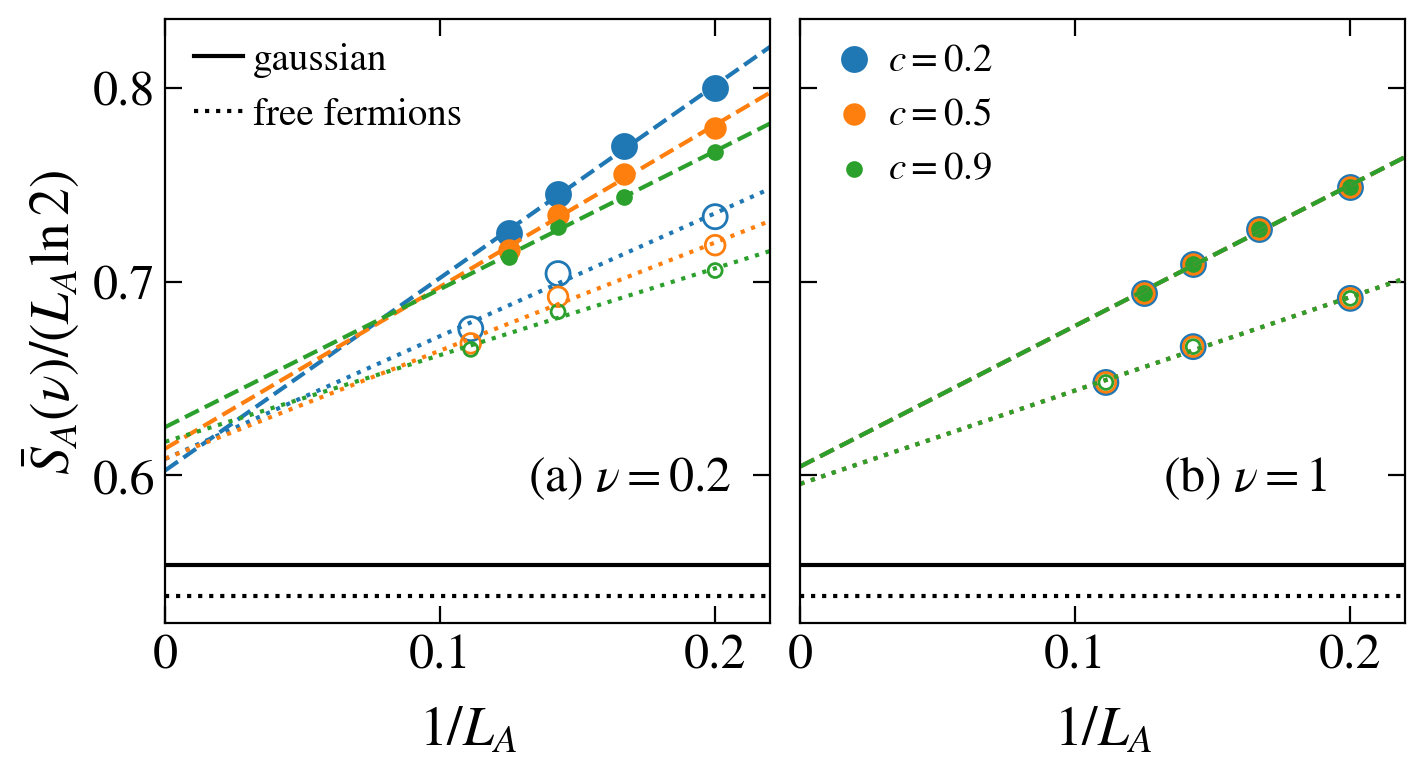

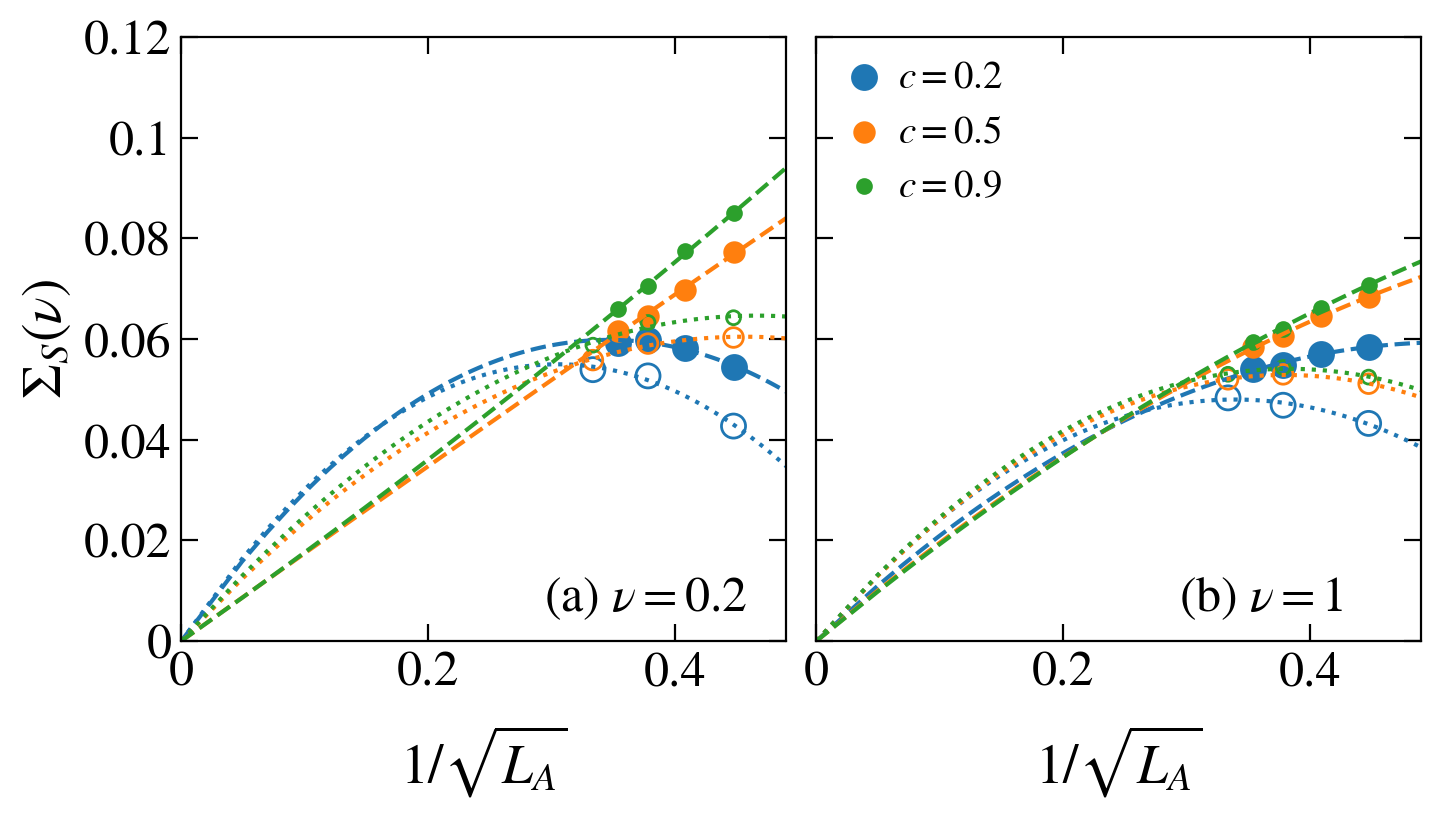

In [22]:

markers = itertools.cycle(markers_ls)
colors_ls_cyc = itertools.cycle(colors_ls)

fig1, axis1 = plt.subplots( nrows=1, ncols=2, figsize=(8,4), dpi = 200, sharey=True)
fig2, axis2 = plt.subplots( nrows=1, ncols=2, figsize=(8,4), dpi = 200, sharey=True)

axis = [ [axis1[0], axis2[0]], [axis1[1], axis2[1]]]

axis[0][0].axhline(y=0.5537, ls='-', c='black', label=r'gaussian')
axis[0][0].axhline(y=0.5378, ls=':', c='black', label=r'free fermions')

axis[1][0].axhline(y=0.5537, ls='-', c='black')
axis[1][0].axhline(y=0.5378, ls=':', c='black')

nu1=0.2
nu2=1.0

J=0.8
c1=0.2
c2=0.5
c3=0.9

plottt(axis[0][0], J=J, c=c1, nu='%s'%nu1, size=75)
plottt(axis[0][0], J=J, c=c2, nu='%s'%nu1, size=50)
plottt(axis[0][0], J=J, c=c3, nu='%s'%nu1, size=25)

colors_ls_cyc = itertools.cycle(colors_ls)
plottt(axis[0][1], J=J, c=c1, moment='var', nu='%s'%nu1, size=75)
plottt(axis[0][1], J=J, c=c2, moment='var', nu='%s'%nu1, size=50)
plottt(axis[0][1], J=J, c=c3, moment='var', nu='%s'%nu1, size=25)

colors_ls_cyc = itertools.cycle(colors_ls)
plottt(axis[1][0], J=J, c=c1, label = r"$c=%g$"%c1, nu='%s'%nu2, size=75)
plottt(axis[1][0], J=J, c=c2, label = r"$c=%g$"%c2, nu='%s'%nu2, size=50)
plottt(axis[1][0], J=J, c=c3, label = r"$c=%g$"%c3, nu='%s'%nu2, size=25)

colors_ls_cyc = itertools.cycle(colors_ls)
plottt(axis[1][1], J=J, c=c1, moment='var', nu='%s'%nu2, label = r"$c=%g$"%c1, size=75)
plottt(axis[1][1], J=J, c=c2, moment='var', nu='%s'%nu2, label = r"$c=%g$"%c2, size=50)
plottt(axis[1][1], J=J, c=c3, moment='var', nu='%s'%nu2, label = r"$c=%g$"%c3, size=25)
# plottt(axis[1][1], d1=-0.48, e1=0.2, moment='var', frac = lambda dim: int(0.5 * dim), nu='0.5')

colors_ls_cyc = itertools.cycle(colors_ls)

# plottt(axis[2][0], d1=0.1, e1=0.1, label = r"$\Delta=0.1,\eta=0.1$", frac=lambda dim: dim+1, nu=1.0)
# plottt(axis[2][0], d1=0.2, e1=0.2, label = r"$\Delta=0.2,\eta=0.2$", frac=lambda dim: dim+1, nu=1.0)
# colors_ls_cyc = itertools.cycle(colors_ls)
# plottt(axis[2][1], d1=0.1, e1=0.1, moment='var', frac=lambda dim: dim+1, nu=1.0)
# plottt(axis[2][1], d1=0.2, e1=0.2, moment='var', frac=lambda dim: dim+1, nu=1.0)
# colors_ls_cyc = itertools.cycle(colors_ls)
# plottt(axis[1], d1=-0.375, e1=0.5, label = r"$\Delta=-0.375,\eta=0.5$")
# plottt(axis[1], d1=-0.75, e1=0.5, label = r"$\Delta=-0.75,\eta=0.5$")


fig_help.set_plot_elements(axis[0][0], ylabel=r"$\bar{S}_A(\nu) / (L_A\ln2)$", xlabel=r"$1 / L_A$", font_size=18, set_legend=True)
axis[0][0].legend(frameon=0, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.01,1.02))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis[0][0].annotate(r"(a) $\nu=%g$"%nu1, fontsize=18, xy=(0.6, 0.22), xycoords='axes fraction')

fig_help.set_plot_elements(axis[1][0], ylabel="", xlabel=r"$1 / L_A$", font_size=18, set_legend=True)
axis[1][0].legend(frameon=0, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.01,1.02))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis[1][0].annotate(r"(b) $\nu=%g$"%nu2, fontsize=18, xy=(0.6, 0.22), xycoords='axes fraction')


fig_help.set_plot_elements(axis[0][1], ylabel=r"$\Sigma_S(\nu)$", xlabel=r"$1 / \sqrt{L_A}$", font_size=18, set_legend=False)#, xscale='log', yscale='log')
axis[0][1].legend(frameon=0, fontsize=14, loc='center right', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(1.03,0.2))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis[0][1].annotate(r"(a) $\nu=%g$"%nu1, fontsize=18, xy=(0.6, 0.05), xycoords='axes fraction')

fig_help.set_plot_elements(axis[1][1], ylabel="", xlabel=r"$1 / \sqrt{L_A}$", font_size=18, set_legend=True)#, xscale='log', yscale='log')
axis[1][1].legend(frameon=0, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.02,1.02))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis[1][1].annotate(r"(b) $\nu=%g$"%nu2, fontsize=18, xy=(0.6, 0.05), xycoords='axes fraction')

for ax in np.array(axis).flatten():
    ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    
fig1.subplots_adjust(wspace = 0.05, hspace=0.05)
fig2.subplots_adjust(wspace = 0.05, hspace=0.05)
# fig1.savefig("PLOTS/Fig_xyz_scaling_av.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig1.savefig("PLOTS/Fig_xyz_scaling_av.png", bbox_inches = 'tight', pad_inches=0.02)
# fig2.savefig("PLOTS/Fig_xyz_scaling_var.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig2.savefig("PLOTS/Fig_xyz_scaling_var.png", bbox_inches = 'tight', pad_inches=0.02)
fig1.savefig(f"Fig_size_scaling_mean.pdf", bbox_inches = 'tight', pad_inches=0.02)
fig1.savefig(f"Fig_size_scaling_mean.pdf", bbox_inches = 'tight', pad_inches=0.02)
fig2.savefig(f"Fig_size_scaling_var.png", bbox_inches = 'tight', pad_inches=0.02)
fig2.savefig(f"Fig_size_scaling_var.png", bbox_inches = 'tight', pad_inches=0.02)

No handles with labels found to put in legend.


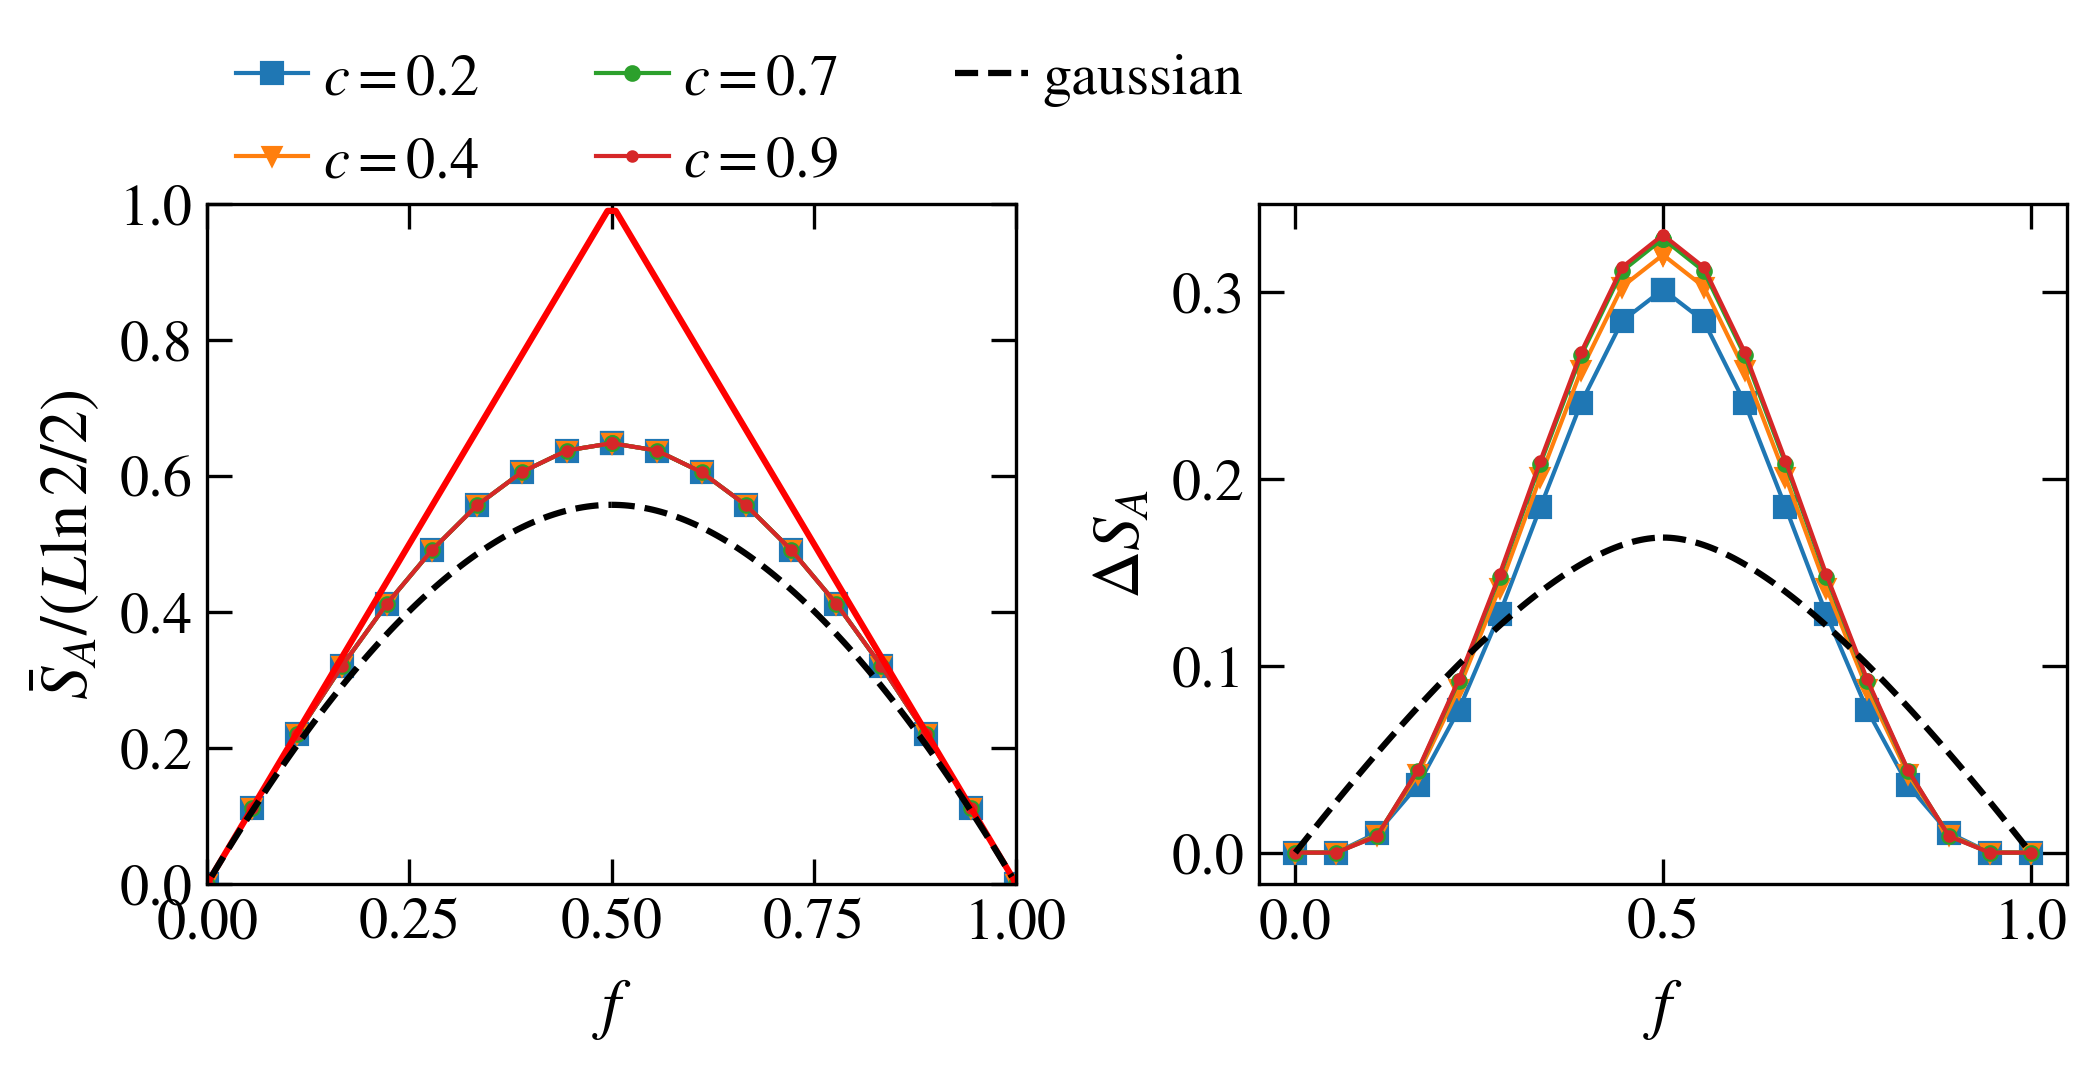

In [84]:

markers = itertools.cycle(markers_ls)

L=18

nu=1.0

J=0.8
J1=0.2
J1=0.4
J1=0.8

c=0.2
c1=0.2
c2=0.4
c3=0.7
c4=0.9

fig = plt.figure(figsize=(8,3), dpi = 300)
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])
axis = [fig.add_subplot(gs[0]) ,fig.add_subplot(gs[1])]

def plot_arc(Lx, J = 0.2, c=0.2, key_label = "", marker='o', size=5, fc = 1):
    # LAA = np.arange(0, L//2+1, 1)
    
    col = next(colors_ls_cyc)
    df = pd.read_csv(f'./RESULTS/nu={nu}/Entropy/_L={L},J={J},c={c}.csv')

    LAA = np.array(df['subsizes'])
    entropy = np.array(df['<S>']) / (Lx//2 * np.log(2))
    # entropy = np.array(df['<S>']) / (LAA * np.log(2))
    entropy_var = np.sqrt(np.array(df['<S^2>'])) #/ (L / 2 * np.log(2))**2

    LAs = [*(LAA / Lx), *(np.ones(LAA.shape) - LAA / Lx)[::-1]]
    entropy = [*entropy, *entropy[::-1]]
    entropy_var = [*entropy_var, *entropy_var[::-1]]
    axis[0].plot(LAs, entropy,     marker=marker, markersize=size, color=col, markerfacecolor=col if fc else None, lw=1, label=key_label)
    axis[1].plot(LAs, entropy_var, marker=marker, markersize=size, color=col, markerfacecolor=col if fc else None, lw=1)
    
    # axis[0].plot(np.ones(LAA.shape) - LAA / Lx, entropy, color=sc[0].get_color(), marker='o', markersize=3, lw=0.5)
    
    # sc = axis[1].plot(LAA / Lx, entropy_var, marker='o', markersize=3, lw=0.5)
    # axis[1].plot(np.ones(LAA.shape) - LAA / Lx, entropy_var, color=sc[0].get_color(), marker='o', markersize=3, lw=0.5)


J=0.8
plot_arc(Lx=L, J=J, c=c1, key_label=r"$c=%g$"%c1, marker='s', size=5)
plot_arc(Lx=L, J=J, c=c2, key_label=r"$c=%g$"%c2, marker='v', size=4)
plot_arc(Lx=L, J=J, c=c3, key_label=r"$c=%g$"%c3, marker='o', size=3)
plot_arc(Lx=L, J=J, c=c4, key_label=r"$c=%g$"%c4, marker='o', size=2)

ff = np.linspace(0, 1.0, 100)
axis[0].plot(ff, 1 - 2*np.abs(0.5 - ff), ls='-', color='red')

ff = np.linspace(0., 0.5, 100)
axis[0].plot(ff, 2 * ff * (1 - (1 + (1-ff)/ff * np.log(1-ff) ) / np.log(2)), ls='--', color='black')

ff = np.linspace(.5, 1., 100)
axis[0].plot(ff, 2 * (1-ff) * (1 - (1 + ff/(1-ff) * np.log(ff) ) / np.log(2)), ls='--', color='black')    


ff = np.linspace(0.0, 0.5, 100)
axis[1].plot(ff, np.sqrt( (ff + ff**2 + np.log(1-ff)) / 2.0 ), ls='--', c='k')
ff = np.linspace(.5, 1.0, 100)
axis[1].plot(ff, np.sqrt( (1-ff + (1-ff)**2 + np.log(ff)) / 2.0 ), ls='--', c='k')

axis[0].plot(np.nan, np.nan, ls='--', c='k', label='gaussian')
axis[1].plot(np.nan, np.nan, ls='--', c='k')
fig_help.set_plot_elements(axis[0], ylabel=r"$\bar{S}_A / (L\ln2/2)$", xlabel="$f$", font_size=14, set_legend=True, xlim=(0,1), ylim=(0,1))
axis[0].legend(frameon=0, fontsize=14, loc='upper left', ncol=3, handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.03,1.3))#, title=r"$\Delta=0.2$", title_fontsize=16)

# ff = np.linspace(0, 0.5, 100)
# axis[1].plot(ff, (1./(L*np.log(2))**2 * (ff * L / 3 + 1/(6*L*ff)))**1.25, ls='--', color='black')


fig_help.set_plot_elements(axis[1], ylabel=r"$\Delta S_A$", xlabel="$f$", font_size=14, set_legend=True, yscale='linear')

fig.subplots_adjust(wspace = 0.3, hspace=0.05)
plt.savefig(f"Fig_subsystem.pdf", bbox_inches = 'tight', pad_inches=0.02)
plt.savefig(f"Fig_subsystem.png", bbox_inches = 'tight', pad_inches=0.02)

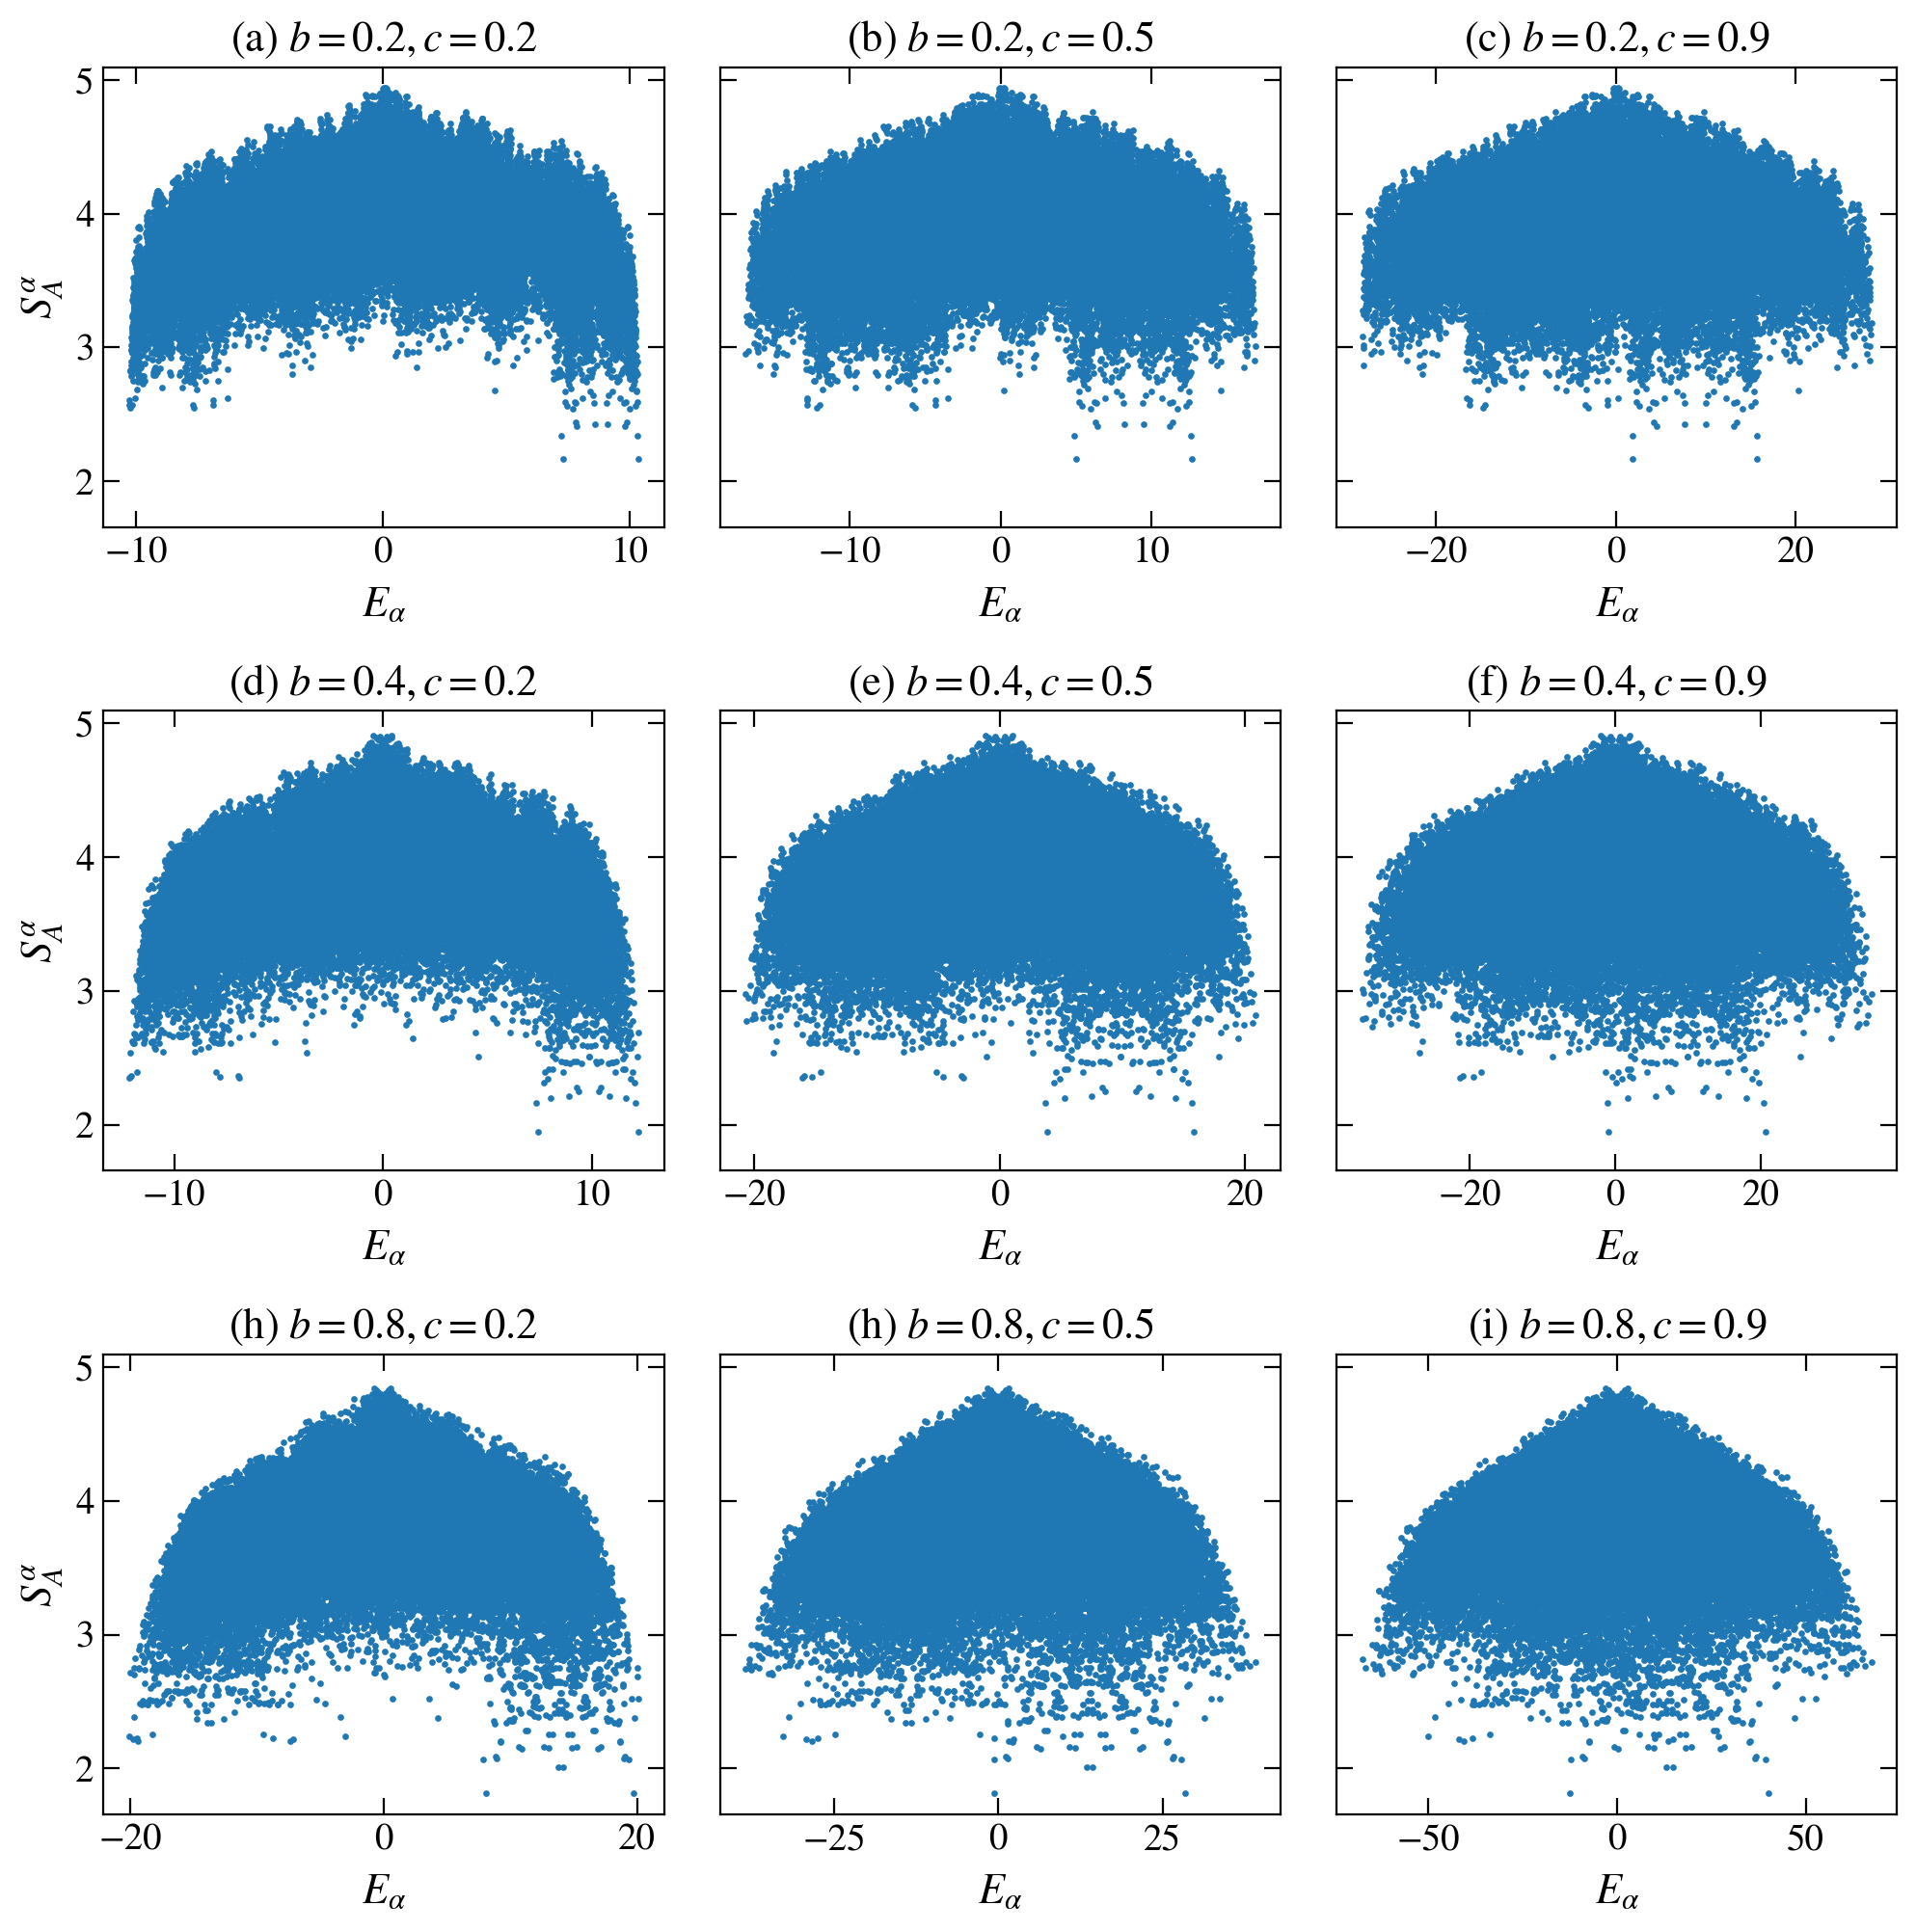

In [143]:
L=17
J=0.1
c=0.1
zz=-1
z1=-1
z2=-1

LA = L//2


fig, axes = plt.subplots( nrows=3, ncols=3, figsize=(12,12), dpi = 200, sharey=True)
axes = axes.flatten()
# for L in
params = [[J, c] for J in [0.2, 0.4, 0.8] for c in [0.2, 0.5, 0.9]]
labs = [r"(a)", r"(b)", r"(c)", r"(d)", r"(e)", r"(f)", r"(h)", r"(h)", r"(i)"]
for ii_pl, [J, c] in enumerate(params):
    axis = axes[ii_pl]
    lab = labs[ii_pl]

    sects = get_sectors(L)

    Etot = []
    Stot = []
    for [zz, z1, z2] in sects:
        
        name = base_dir + 'Entropy/Eigenstate/' + info(L=L, J=J, c=c, zz=zz, z1=z1, z2=z2, ext='.hdf5')
        if exists(name):
            with h5py.File(name, "r") as file:
                E = np.array(file.get('energies'))[0]
                S = np.array(file.get('entropy'))[LA]
                Etot = [*Etot, *E]
                Stot = [*Stot, *S]
                
        else:
            print(name)
    axis.scatter(E, S, s=2)
    fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$" if ii_pl % 3 == 0 else "", xlabel=r"$E_\alpha$", font_size=14, set_legend=False)
    # axis.annotate(lab + r"$J=%g,c=%g$"%(J,c), fontsize=14, xy=(0.3, 0.05), xycoords='axes fraction')
    axis.set_title(lab + r" $b=%g,c=%g$"%(J,c), fontsize=16)
fig.subplots_adjust(wspace = 0.1, hspace=0.4)

plt.savefig(f"Fig_L={L}.pdf", bbox_inches = 'tight', pad_inches=0.02)
plt.savefig(f"Fig_L={L}.png", bbox_inches = 'tight', pad_inches=0.02)

## COMPARE TO XXZ, XYZ

[0.5927172  0.58757977 0.58201161 0.5775942  0.57339377]
22 0.55 mean [0.37315177 0.54012916]
[0.67793415 0.66477563 0.65259201 0.64297602 0.6343894  0.62696534]
24 0.55 mean [0.85880972 0.55644148]
22 0.1 0.1 [0.57384936 0.58054141]
21 0.1 0.1 [0.42194144 0.55135833]
22 0.2 0.2 [0.64515702 0.56285224]
21 0.2 0.2 [0.49916338 0.54285062]
18 0.8 0.9 [0.44735743 0.6173327 ]
17 0.8 0.9 [0.71203755 0.62490349]
22 0.55 var [ 0.28877453 -0.36083207  1.        ]
0.2 var INTEGRABLE 0.1 0.1 [ 0.28877453 -0.36083207  1.        ]
24 0.55 var [ 0.26542873 -0.31347242  1.        ]
0.2 var INTEGRABLE 0.1 0.1 [ 0.26542873 -0.31347242  1.        ]
0.2 var INTEGRABLE 0.1 0.1 [ 0.29619303 -0.30255653]
0.2 var INTEGRABLE 0.1 0.1 [0.19836825 0.20843084]
0.2 var INTEGRABLE 0.2 0.2 [ 0.2669398  -0.26869887]
0.2 var INTEGRABLE 0.2 0.2 [0.17016915 0.18064131]
0.2 var INTEGRABLE 0.8 0.9 [ 0.27757935 -0.29801325]
0.2 var INTEGRABLE 0.8 0.9 [0.1721663  0.04032287]
[0.56577982 0.56333662 0.56072686 0.55817972 0.55

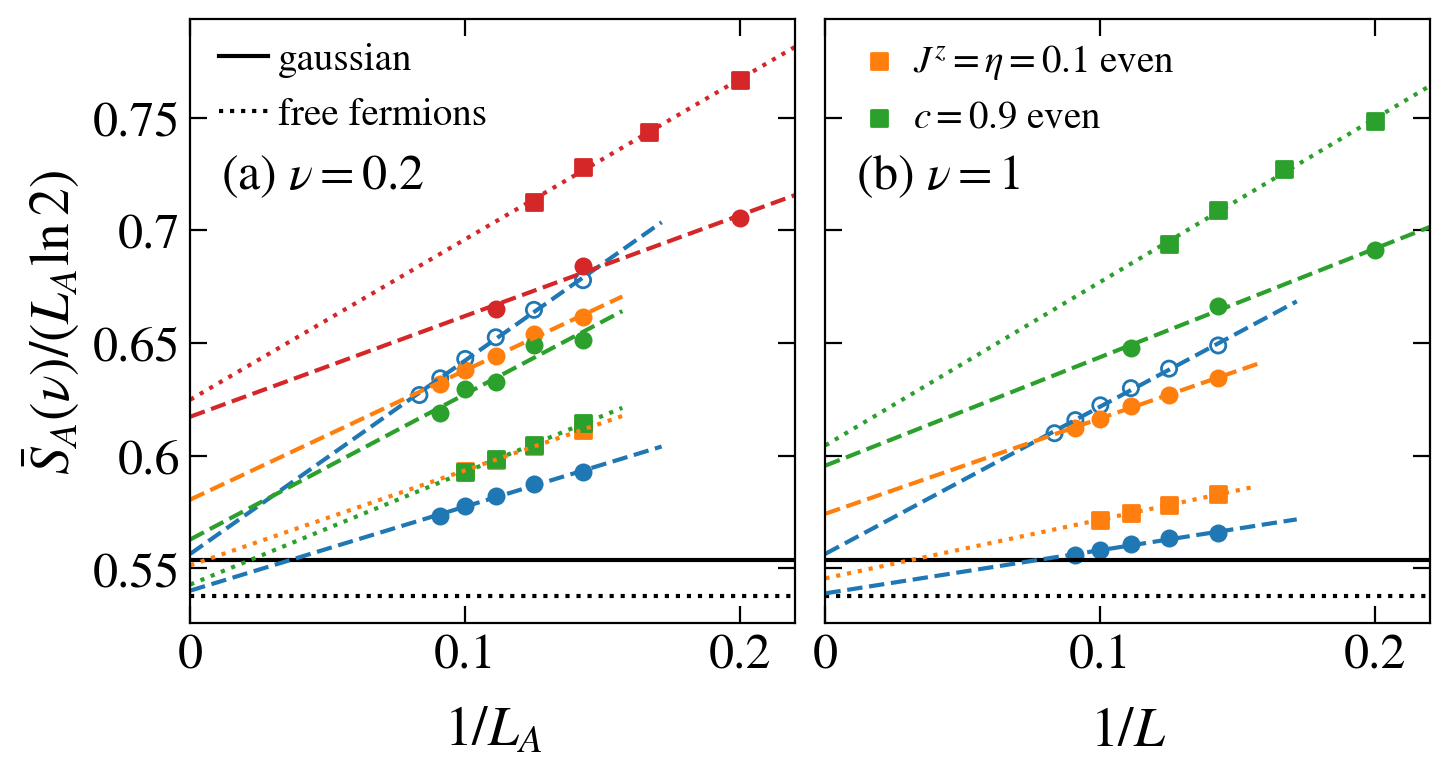

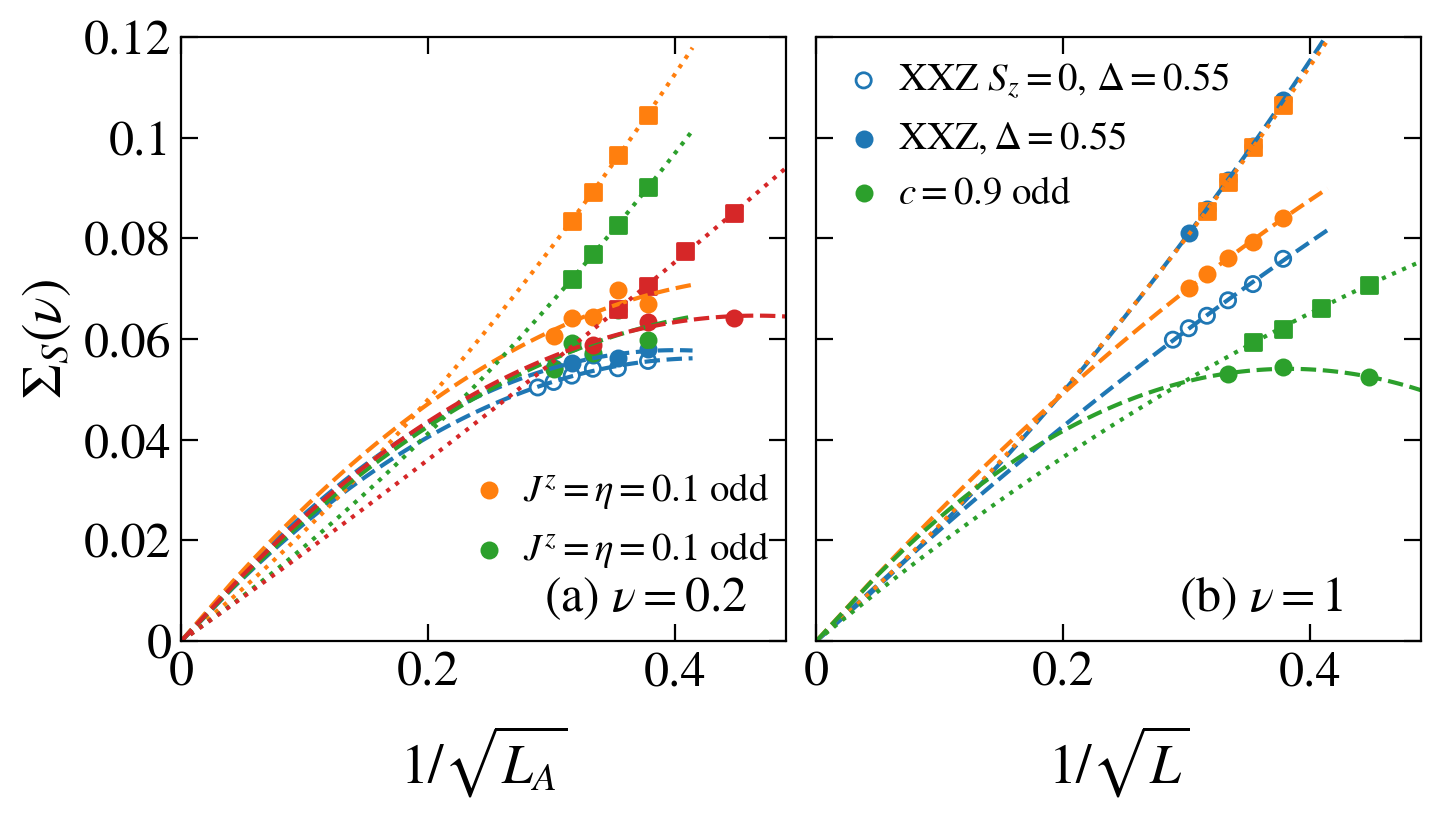

In [140]:

markers = itertools.cycle(markers_ls)
colors_ls_cyc = itertools.cycle(colors_ls)

fig1, axis1 = plt.subplots( nrows=1, ncols=2, figsize=(8,4), dpi = 200, sharey=True)
fig2, axis2 = plt.subplots( nrows=1, ncols=2, figsize=(8,4), dpi = 200, sharey=True)

axis = [ [axis1[0], axis2[0]], [axis1[1], axis2[1]]]

axis[0][0].axhline(y=0.5537, ls='-', c='black', label=r'gaussian')
axis[0][0].axhline(y=0.5378, ls=':', c='black', label=r'free fermions')

axis[1][0].axhline(y=0.5537, ls='-', c='black')
axis[1][0].axhline(y=0.5378, ls=':', c='black')

nu1=0.2
nu2=1.0

J=0.8
c=0.9

delta=0.55
d1=0.1
e1=0.1

# plottt(axis[0][0], J=J, c=c1, nu='%s'%nu1, size=75)
plottt_xxz(axis[0][0], delta = delta, nu='%s'%nu1)
colors_ls_cyc = itertools.cycle(colors_ls)
plottt_xxz(axis[0][0], delta = delta, nu='%s'%nu1, useU1=True, U1sec=-1)
plottt_xyz(axis[0][0], d1=0.1, e1=0.1, nu='%s'%nu1)
plottt_xyz(axis[0][0], d1=0.2, e1=0.2, nu='%s'%nu1)
plottt(axis[0][0], J=J, c=c, nu='%s'%nu1)

colors_ls_cyc = itertools.cycle(colors_ls)
# plottt(axis[0][1], J=J, c=c1, moment='var', nu='%s'%nu1, size=75)
# plottt(axis[0][1], J=J, c=c2, moment='var', nu='%s'%nu1, size=50)
plottt_xxz(axis[0][1], delta = delta, moment='var', nu='%s'%nu1)
colors_ls_cyc = itertools.cycle(colors_ls)
plottt_xxz(axis[0][1], delta = delta, moment='var', nu='%s'%nu1, useU1=True, U1sec=-1)
plottt_xyz(axis[0][1], d1=d1, e1=d1, moment='var', nu='%s'%nu1, label = r"$J^z=\eta=0.1$ odd")

d1=0.2
e1=0.2
plottt_xyz(axis[0][1], d1=d1, e1=d1, moment='var', nu='%s'%nu1, label = r"$J^z=\eta=0.1$ odd")
plottt(axis[0][1], J=J, c=c, moment='var', nu='%s'%nu1)

d1=0.1
e1=0.1
colors_ls_cyc = itertools.cycle(colors_ls)
# plottt(axis[1][0], J=J, c=c1, label = r"$c=%g$"%c1, nu='%s'%nu2, size=75)
# plottt(axis[1][0], J=J, c=c2, label = r"$c=%g$"%c2, nu='%s'%nu2, size=50)
plottt_xxz(axis[1][0], delta = delta, nu='%s'%nu2)
colors_ls_cyc = itertools.cycle(colors_ls)
plottt_xxz(axis[1][0], delta = delta, nu='%s'%nu2, useU1=True, U1sec=-1)
plottt_xyz(axis[1][0], d1=d1, e1=e1, nu='%s'%nu2, label = r"$J^z=\eta=0.1$ even")
plottt(axis[1][0], J=J, c=c, label = r"$c=%g$ even"%c, nu='%s'%nu2)

colors_ls_cyc = itertools.cycle(colors_ls)
plottt_xxz(axis[1][1], delta = delta, moment='var', label=r"XXZ $S_z=0$" + r", $\Delta=0.55$", nu='%s'%nu2, useU1=True, U1sec=-1)
colors_ls_cyc = itertools.cycle(colors_ls)
plottt_xxz(axis[1][1], delta = delta, moment='var', label=r"XXZ" + r"$, \Delta=0.55$", nu='%s'%nu2)
plottt_xyz(axis[1][1], d1=d1, e1=d1, moment='var', nu='%s'%nu2)
plottt(axis[1][1], J=J, c=c, moment='var', nu='%s'%nu2, label = r"$c=%g$ odd"%c)
# plottt(axis[1][1], d1=-0.48, e1=0.2, moment='var', frac = lambda dim: int(0.5 * dim), nu='0.5')

colors_ls_cyc = itertools.cycle(colors_ls)

# plottt(axis[2][0], d1=0.1, e1=0.1, label = r"$\Delta=0.1,\eta=0.1$", frac=lambda dim: dim+1, nu=1.0)
# plottt(axis[2][0], d1=0.2, e1=0.2, label = r"$\Delta=0.2,\eta=0.2$", frac=lambda dim: dim+1, nu=1.0)
# colors_ls_cyc = itertools.cycle(colors_ls)
# plottt(axis[2][1], d1=0.1, e1=0.1, moment='var', frac=lambda dim: dim+1, nu=1.0)
# plottt(axis[2][1], d1=0.2, e1=0.2, moment='var', frac=lambda dim: dim+1, nu=1.0)
# colors_ls_cyc = itertools.cycle(colors_ls)
# plottt(axis[1], d1=-0.375, e1=0.5, label = r"$\Delta=-0.375,\eta=0.5$")
# plottt(axis[1], d1=-0.75, e1=0.5, label = r"$\Delta=-0.75,\eta=0.5$")


fig_help.set_plot_elements(axis[0][0], ylabel=r"$\bar{S}_A(\nu) / (L_A\ln2)$", xlabel=r"$1 / L_A$", font_size=18, set_legend=True)
axis[0][0].legend(frameon=0, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.01,1.02))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis[0][0].annotate(r"(a) $\nu=%g$"%nu1, fontsize=18, xy=(0.05, 0.72), xycoords='axes fraction')

fig_help.set_plot_elements(axis[1][0], ylabel="", xlabel=r"$1 / L$", font_size=18, set_legend=True)
axis[1][0].legend(frameon=0, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.01,1.02))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis[1][0].annotate(r"(b) $\nu=%g$"%nu2, fontsize=18, xy=(0.05, 0.72), xycoords='axes fraction')


fig_help.set_plot_elements(axis[0][1], ylabel=r"$\Sigma_S(\nu)$", xlabel=r"$1 / \sqrt{L_A}$", font_size=18, set_legend=False)#, xscale='log', yscale='log')
axis[0][1].legend(frameon=0, fontsize=14, loc='center right', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(1.03,0.2))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis[0][1].annotate(r"(a) $\nu=%g$"%nu1, fontsize=18, xy=(0.6, 0.05), xycoords='axes fraction')

fig_help.set_plot_elements(axis[1][1], ylabel="", xlabel=r"$1 / \sqrt{L}$", font_size=18, set_legend=True)#, xscale='log', yscale='log')
axis[1][1].legend(frameon=0, fontsize=14, loc='upper left', handletextpad=0.25, handlelength = 1.25, bbox_to_anchor=(-0.02,1.02))#, title=r"$\Delta=0.2$", title_fontsize=16)
axis[1][1].annotate(r"(b) $\nu=%g$"%nu2, fontsize=18, xy=(0.6, 0.05), xycoords='axes fraction')

for ax in np.array(axis).flatten():
    ax.xaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.yaxis.set_minor_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    ax.yaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, pos: "%g"%x))
    
fig1.subplots_adjust(wspace = 0.05, hspace=0.05)
fig2.subplots_adjust(wspace = 0.05, hspace=0.05)
# fig1.savefig("PLOTS/Fig_xyz_scaling_av.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig1.savefig("PLOTS/Fig_xyz_scaling_av.png", bbox_inches = 'tight', pad_inches=0.02)
# fig2.savefig("PLOTS/Fig_xyz_scaling_var.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig2.savefig("PLOTS/Fig_xyz_scaling_var.png", bbox_inches = 'tight', pad_inches=0.02)
# fig1.savefig(f"Fig_size_scaling_mean.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig1.savefig(f"Fig_size_scaling_mean.pdf", bbox_inches = 'tight', pad_inches=0.02)
# fig2.savefig(f"Fig_size_scaling_var.png", bbox_inches = 'tight', pad_inches=0.02)
# fig2.savefig(f"Fig_size_scaling_var.png", bbox_inches = 'tight', pad_inches=0.02)

No handles with labels found to put in legend.


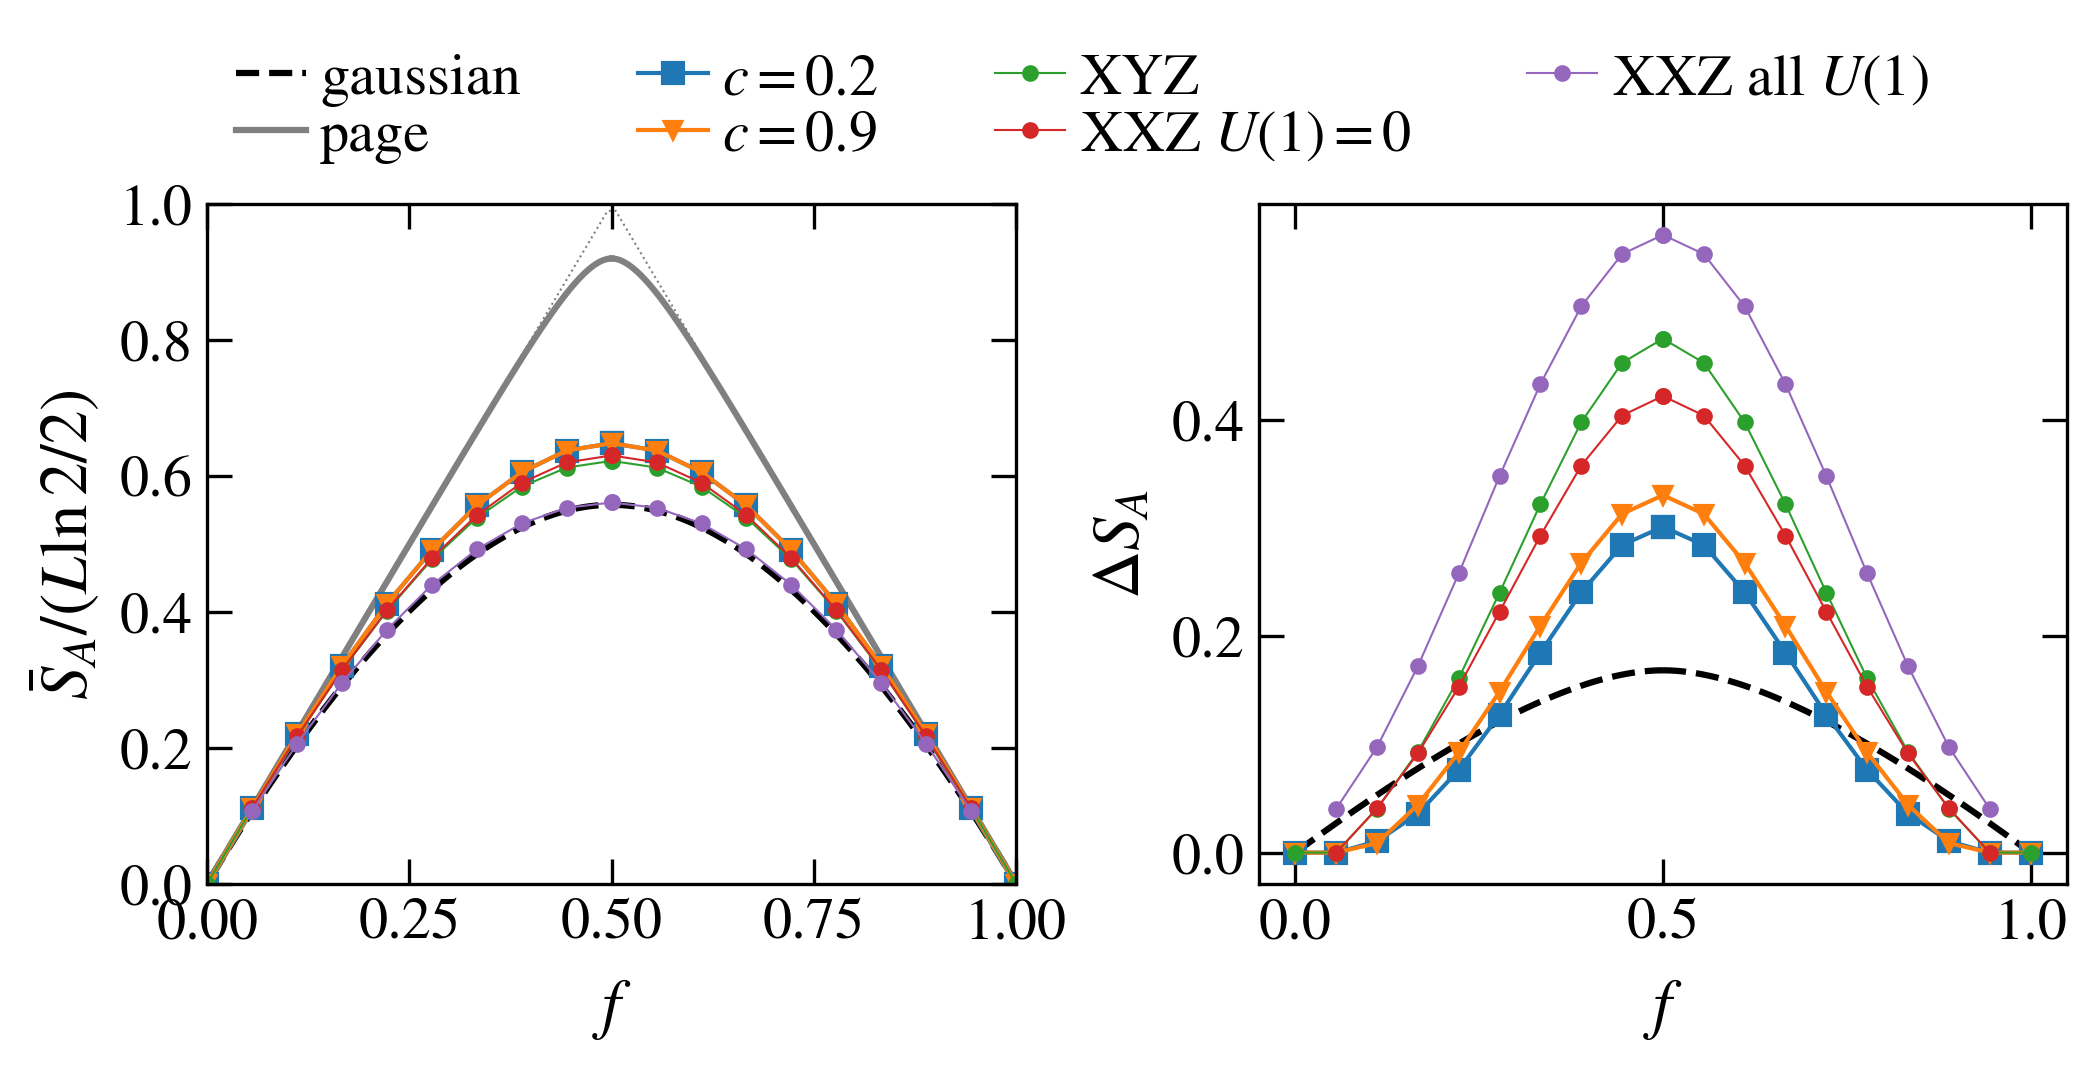

In [119]:

markers = itertools.cycle(markers_ls)
colors_ls_cyc = itertools.cycle(colors_ls)

L=18
Lxxz=18

nu=1.0

J1=1.0
d1=0.1
e1=0.1

def _page(L_a, L_b, subsystem = 'a'):
    d_a = 2**L_a
    d_b = 2**L_b
    if subsystem == 'a': return digamma(d_a * d_b + 1) - digamma(d_b + 1) - (d_a - 1) / (2 * d_b)
    elif subsystem == 'b': return digamma(d_a * d_b + 1) - digamma(d_a + 1) - (d_b - 1) / (2 * d_a)
    else: 
        print('Not chosen subsystem')
        return 0
    
fig = plt.figure(figsize=(8,3), dpi = 300)
gs = GridSpec(nrows=1, ncols=2, width_ratios=[1, 1])
axis = [fig.add_subplot(gs[0]) ,fig.add_subplot(gs[1])]

def plot_arc_xx(L, choice = 0, key_label = ""):
    # LAA = np.arange(0, L//2+1, 1)
    
    col = next(colors_ls_cyc)
    Lx = Lxxz
    if choice == 0:
        Lx = L   
        df = pd.read_csv(f'../../XYZ/Jupyter_Python/RESULTS2/nu={nu}/Entropy/_L={L},eta={e1},delta={d1}.csv')
    elif choice == 1:   
        df = pd.read_csv(f'../../XYZ/Jupyter_Python/RESULTS_XXZ/nu={nu}/L={Lxxz}/_U1=%d,delta=0.55.csv'%(Lxxz//2))
    else:               
        df = pd.read_csv(f'../../XYZ/Jupyter_Python/RESULTS_XXZ/nu={nu}/L={Lxxz}/_all_U1,delta=0.55.csv')
    
    LAA = np.array(df['subsizes'])
    entropy = np.array(df['<S>']) / (Lx//2 * np.log(2))
    entropy_var = np.sqrt(np.array(df['<S^2>']))# / (L / 2 * np.log(2))**2

    axis[0].plot(LAA / Lx, entropy, label=key_label, marker='o', markersize=3, lw=0.5, color=col)
    
    axis[0].plot(np.ones(LAA.shape) - LAA / Lx, entropy, marker='o', markersize=3, lw=0.5, color=col)
    
    axis[1].plot(LAA / Lx, entropy_var, marker='o', markersize=3, lw=0.5, color=col)
    axis[1].plot(np.ones(LAA.shape) - LAA / Lx, entropy_var, color=col, marker='o', markersize=3, lw=0.5)

ff = np.linspace(0, 1.0, 100)
axis[0].plot(ff, 1 - 2*np.abs(0.5 - ff), ls=':', lw=0.5, color='gray')

ff = np.linspace(0., 0.5, 100)
axis[0].plot(ff, 2 * ff * (1 - (1 + (1-ff)/ff * np.log(1-ff) ) / np.log(2)), ls='--', color='black')
axis[0].plot(ff, _page(ff*L, (1-ff)*L, subsystem = 'a') / (L/2*np.log(2)), ls='-', color='gray')

ff = np.linspace(.5, 1., 100)
axis[0].plot(ff, 2 * (1-ff) * (1 - (1 + ff/(1-ff) * np.log(ff) ) / np.log(2)), ls='--', color='black', label='gaussian')
axis[0].plot(ff, _page(ff*L, (1-ff)*L, subsystem = 'b') / (L/2*np.log(2)), ls='-', color='gray', label='page')    


ff = np.linspace(0.0, 0.5, 100)
axis[1].plot(ff, np.sqrt( (ff + ff**2 + np.log(1-ff)) / 2.0 ), ls='--', c='k')
ff = np.linspace(.5, 1.0, 100)
axis[1].plot(ff, np.sqrt( (1-ff + (1-ff)**2 + np.log(ff)) / 2.0 ), ls='--', c='k')


J=0.8
c1=0.2
c2=0.9
plot_arc(Lx=L, J=J, c=c1, key_label=r"$c=%g$"%c1, marker='s', size=5)
plot_arc(Lx=L, J=J, c=c2, key_label=r"$c=%g$"%c2, marker='v', size=4)
plot_arc_xx(L=L, choice = 0, key_label="XYZ")
plot_arc_xx(L=L, choice = 1, key_label="XXZ $U(1)=0$")
plot_arc_xx(L=L, choice = 2, key_label="XXZ all $U(1)$")


fig_help.set_plot_elements(axis[0], ylabel=r"$\bar{S}_A / (L\ln2/2)$", xlabel="$f$", font_size=14, set_legend=True, xlim=(0,1), ylim=(0,1))
axis[0].legend(frameon=0, fontsize=14, loc='upper left', ncol=4, handletextpad=0.25, handlelength = 1.2, bbox_to_anchor=(-0.03,1.3), labelspacing=0.05)#, title=r"$\Delta=0.2$", title_fontsize=16)

# ff = np.linspace(0, 0.5, 100)
# axis[1].plot(ff, (1./(L*np.log(2))**2 * (ff * L / 3 + 1/(6*L*ff)))**1.25, ls='--', color='black')


fig_help.set_plot_elements(axis[1], ylabel=r"$\Delta S_A$", xlabel="$f$", font_size=14, set_legend=True, yscale='linear')

fig.subplots_adjust(wspace = 0.3, hspace=0.05)

18 262144 262144
../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=0,d1=0.1,d2=0,e1=0.1,e2=0,hx=0,hz=0,k=8,zx=1,zz=1,edge=0.hdf5
18 262144 254836
/Users/rafal.swietek/Library/CloudStorage/CloudMounter-RafałŚwiętek/Shared with me/Python/Colab/ProjectsData/2023_Integrable_XYZ_XXZ/DATA/RAW/SUSY/XYZ_M/SQ,PBC,d=1,Ns=18,Lx=18,Ly=1,Lz=1/,xyz,Ns=18,Ja=1.000,Jb=0.000,hx=0.000,hz=0.000,dA=0.550,dB=0.000,eA=0.000,eB=0.000,pb=0,T=0,PZ=1,R=-1,U1=0.00,BC=0.h5
/Users/rafal.swietek/Library/CloudStorage/CloudMounter-RafałŚwiętek/Shared with me/Python/Colab/ProjectsData/2023_Integrable_XYZ_XXZ/DATA/RAW/SUSY/XYZ_M/SQ,PBC,d=1,Ns=18,Lx=18,Ly=1,Lz=1/,xyz,Ns=18,Ja=1.000,Jb=0.000,hx=0.000,hz=0.000,dA=0.550,dB=0.000,eA=0.000,eB=0.000,pb=0,T=9,PZ=1,R=-1,U1=0.00,BC=0.h5
/Users/rafal.swietek/Library/CloudStorage/CloudMounter-RafałŚwiętek/Shared with me/Python/Colab/ProjectsData/2023_Integrable_XYZ_XXZ/DATA/RAW/SUSY/XYZ_M/SQ,PBC,d=1,Ns=18,Lx=18,Ly=1,Lz=1/,xyz,Ns=18,Ja=1.000,Jb=0.000,hx=0.000,

Text(0.5, 1.0, '$L=18$')

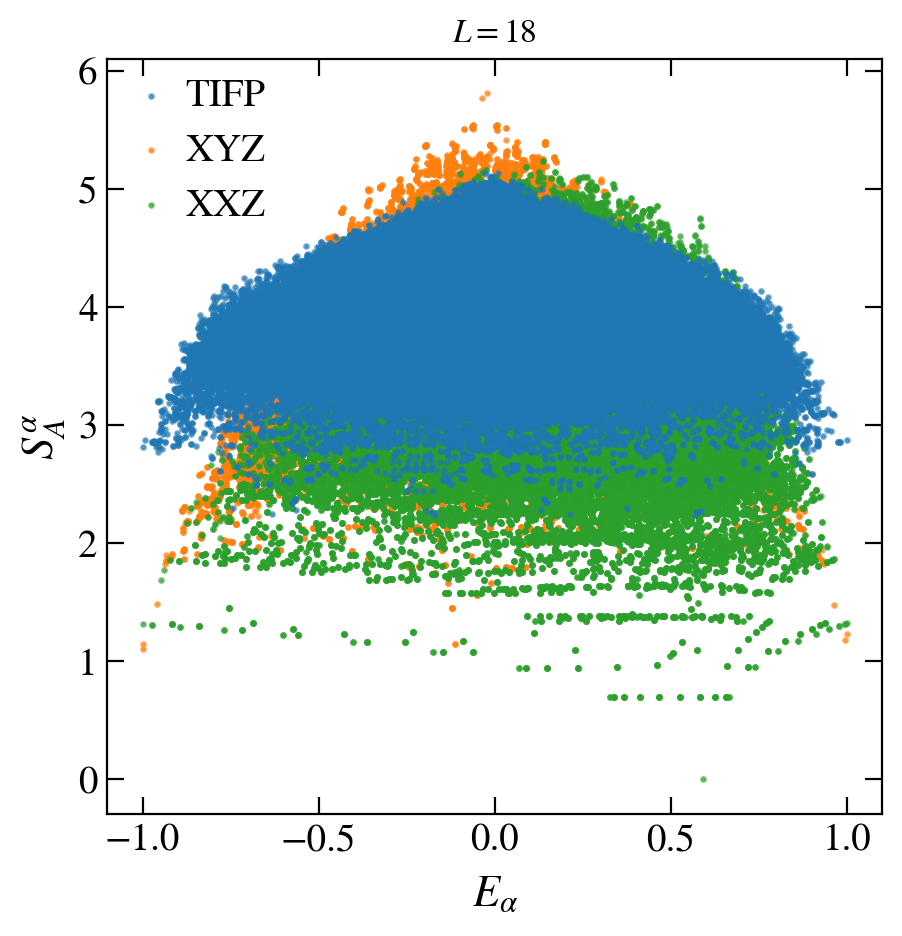

In [48]:
    

def info_base(L, J1=0, J2=0, delta1=0, delta2=0, eta1=0, eta2=0, hx=0, hz=0):
    """
    Main body of file names with model parameters as input
    """
    arr = [J1, J2, delta1, delta2, eta1, eta2, hx, hz]
    names = ['J1', 'J2','d1', 'd2', 'e1', 'e2', 'hx', 'hz']
    info = "_L=%d"%L
    for i, var in enumerate(arr):
        n = order_of_magnitude(var)
        info += str(",%s={:.%df}"%(names[i], n)).format(round(var, n))
    return info


def info_sym(L, J1=0, J2=0, delta1=0, delta2=0, eta1=0, eta2=0, hx=0, hz=0, k=0, p=1, zx=1, zz=1, edge = False, BOUNDARY_COND = 'PBC'):
    """
    Main body of file names with model parameters as input for symmetric model with symmetry sectors as input
    """
    info = info_base(L, J1, J2, delta1, delta2, eta1, eta2, hx, hz)
    if BOUNDARY_COND == 'PBC':                          info += ",k=%d"%k
    if BOUNDARY_COND == 'OBC' or (k==0 or k==L/2):      info += ",p=%d"%p
    if hz == 0 and not edge and (L % 2 == 0 or hx != 0):info += ",zx=%d"%zx
    if hx == 0:                                         info += ",zz=%d"%zz
    info += ",edge=%d"%edge
    return info


L=18

J=0.8
c=0.9

zz=-1
z1=-1
z2=-1

LA = L//2


fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharey=True)

sects = get_sectors(L)
Etot = []
Stot = []
dim_tot = 0
for [zz, z1, z2] in sects:
    
    name = base_dir + 'Entropy/Eigenstate/' + info(L=L, J=J, c=c, zz=zz, z1=z1, z2=z2, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('energies'))[0]
            dim_tot += E.size
            S = np.array(file.get('entropy'))[LA]# / page(LA, L-LA)
            Etot = [*Etot, *E]
            Stot = [*Stot, *S]
            
    else:
        print(name)
print(L, 2**L, dim_tot)
Etot = np.array(Etot)
Etot = (2 * Etot - (np.max(Etot) + np.min(Etot))) / (np.max(Etot) - np.min(Etot))
Stot = np.array(Stot)
axis.scatter(Etot, Stot, s=2, label='TIFP', zorder=5, alpha=0.6)

L=18
LA = L//2
J1=1
d1=0.1
e1=0.1
real_sec, imag_sec = get_sectors_xx(L)
sects = real_sec + imag_sec
Etot = []
Stot = []
dim_tot = 0
for [ks, ps, zxs, zzs] in sects:
    
    name = '../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/' + info_sym(L=L, J1=J1, delta1=d1, eta1=e1, k=ks, p=ps, zx=zxs, zz=zzs) + ".hdf5"
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('energies'))[0]
            dim_tot += E.size * (1 if ks == 0 or (ks == L // 2 and L%2==0) else 2)
            S = np.array(file.get('entropy'))[LA]# / page(LA, L-LA)
            Etot = [*Etot, *E] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot, *E, *E]
            Stot = [*Stot, *S] if ks == 0 or (ks == L // 2 and L%2==0) else [*Stot, *S, *S]
            
    else:
        print(name)
print(L, 2**L, dim_tot)
Etot = np.array(Etot)
Etot = (2 * Etot - (np.max(Etot) + np.min(Etot))) / (np.max(Etot) - np.min(Etot))
Stot = np.array(Stot)
axis.scatter(Etot, Stot, s=2, label='XYZ', zorder=0, alpha=0.6)


L=18
U1=L//2
LA = L//2
J1=1
d1=0.55
J2=0.0
d2=0.0

Etot = []
Stot = []
dim_tot = 0
for U1 in range(0, L):
    Sz = U1 - L/2
    real_sec, imag_sec = get_sectors_xx(L, hx=0.1, hz=0 if U1 == L/2 else 0.1)
    sects = real_sec + imag_sec
    for [ks, ps, zxs, zzs] in sects:
        name = maks_data + f"SQ,PBC,d=1,Ns={L},Lx={L},Ly=1,Lz=1/" + info_maks(L=L, J1=J1, delta1=d1, delta2=0, k=ks, p=ps, zx=zxs, zz=zzs, U1=U1) + ".h5"
        Ename = 'energy'
        sub_idx = 1
        # if not exists(name):
        #     # print("Maks not found:", name)
        #     sub_idx = 0
        #     Ename = 'energies'
        #     name =  f"../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/" + info_xxz_sym(L=L, J1=1, J2=J2, delta1=d1, delta2=0, hz=0.0, k=ks, p=ps, zx=zxs, Sz=Sz) + ".hdf5"
        if exists(name):
            with h5py.File(name, "r") as file:
                E = np.array(file.get(Ename))[0]
                dim_tot += E.size * (1 if ks == 0 or (ks == L // 2 and L%2==0) else 2)
                S = np.transpose(np.array(file.get('entropy')))
                # print(S.shape)
                S = S[LA-1]# / page(LA, L-LA)
                Etot = [*Etot, *E] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot, *E, *E]
                Stot = [*Stot, *S] if ks == 0 or (ks == L // 2 and L%2==0) else [*Stot, *S, *S]
        else:
            print(name)

print(L, 2**L, dim_tot)
Etot = np.array(Etot)
Etot = (2 * Etot - (np.max(Etot) + np.min(Etot))) / (np.max(Etot) - np.min(Etot))
Stot = np.array(Stot)
axis.scatter(Etot, Stot, s=2, label='XXZ', zorder=0, alpha=0.6)

# axis.set_ylim(None, 1)
fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha$", font_size=14, set_legend=False)
fig_help.set_legend(axis, loc = 'upper left', fontsize=14, ncol=1)#, anchor=(-0.02, 0.35))
fig.subplots_adjust(wspace = 0.1, hspace=0.4)
axis.set_title(r"$L=%d$"%L)

../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/_L=22,J1=1,J2=0,d1=0.1,d2=0,e1=0.1,e2=0,hx=0,hz=0,k=9,zx=1,zz=1,edge=0.hdf5
../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/_L=22,J1=1,J2=2,d1=0.1,d2=0.1,e1=0.1,e2=0.1,hx=0,hz=0,k=9,zx=1,zz=1,edge=0.hdf5
../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/_L=22,J1=1,J2=0,d1=0.1,d2=0,e1=0.1,e2=0,hx=0,hz=0,k=10,zx=1,zz=1,edge=0.hdf5
../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/_L=22,J1=1,J2=2,d1=0.1,d2=0.1,e1=0.1,e2=0.1,hx=0,hz=0,k=10,zx=1,zz=1,edge=0.hdf5
[6.92832294e-01 6.92721864e-01 6.92572880e-01 6.92371985e-01
 6.92101257e-01 6.91736690e-01 6.91246190e-01 6.90586955e-01
 6.89702070e-01 6.88516133e-01 6.86929712e-01 6.84812428e-01
 6.81994571e-01 6.78257252e-01 6.73321479e-01 6.66837061e-01
 6.58373221e-01 6.47414164e-01 6.33364764e-01 6.15573693e-01
 5.93382946e-01 5.66212252e-01 5.33682130e-01 4.95769916e-01
 4.52983216e-01 4.06526516e-01 3.58400399e-01 3.11272482e-01
 2.67927992e-01 2.30426045e-01 1.99524421e-01 1.747

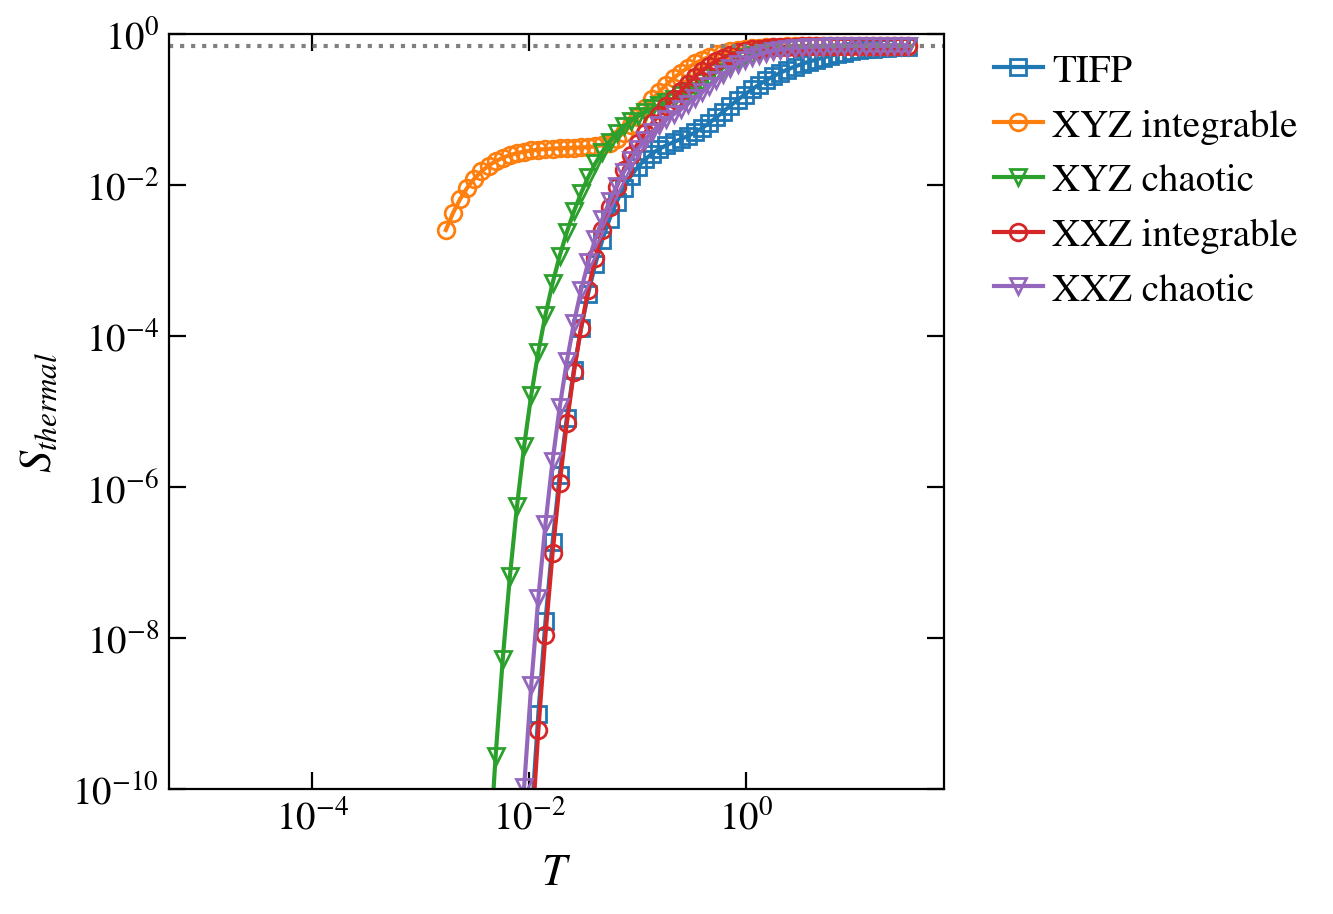

In [233]:
L=15

J=0.8
c=0.9

zz=-1
z1=-1
z2=-1

LA = L//2


colors_ls_cyc = itertools.cycle(colors_ls)
betas = np.logspace(-1.5, 5, 100)

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharey=True)

sects = get_sectors(L)

entropy_th = np.zeros((betas.size))

col = next(colors_ls_cyc)
dim_tot = 0
Etot = []
for [zz, z1, z2] in sects:
    
    name = base_dir + 'Entropy/Eigenstate/' + info(L=L, J=J, c=c, zz=zz, z1=z1, z2=z2, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('energies'))[0]
            dim = E.size
            dim_tot += dim
            Etot = [*Etot, *E]
            # S = np.array(file.get('entropy'))[LA] / page(LA, L-LA)
            
            # for ii_b, beta in enumerate(betas):
            #     ent = thermal_entropy(E, beta)
            #     entropy_th[ii_b] += ent * dim
            
    else:
        print(name)

# entropy_th /= dim_tot
# axis.plot(1./betas, entropy_th, marker='s', label='TIFP', color=col)

Etot = np.array(Etot)
entropy_th = np.zeros((betas.size))
for ii_b, beta in enumerate(betas):
    entropy_th[ii_b] += thermal_entropy(Etot, beta)
axis.plot(1./betas, entropy_th, marker='s', label='TIFP', color=col, markerfacecolor='None')

L=22
LA = L//2
J1=1
d1=0.1
e1=0.1
J2=2.0
d2=d1
e2=e1
real_sec, imag_sec = get_sectors_xx(L)
sects = real_sec + imag_sec

entropy_th_int = np.zeros((betas.size))
entropy_th_ch = np.zeros((betas.size))
dim_tot = 0
Etot_ch = []
Etot_int = []
col1 = next(colors_ls_cyc)
col2 = next(colors_ls_cyc)
for [ks, ps, zxs, zzs] in sects:
    
    name1 = '../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/' + info_sym(L=L, J1=J1, delta1=d1, eta1=e1, k=ks, p=ps, zx=zxs, zz=zzs) + ".hdf5"
    name2 = '../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/' + info_sym(L=L, J1=J1, J2=J2, delta1=d1, eta1=e1, delta2=d2, eta2=e2, k=ks, p=ps, zx=zxs, zz=zzs) + ".hdf5"
    if exists(name1) and exists(name2):
        with h5py.File(name1, "r") as file:
            Eint = np.array(file.get('energies'))[0]
            dim = Eint.size
            dim_tot += dim
            Etot_int = [*Etot_int, *Eint] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot_int, *Eint, *Eint]
        
        with h5py.File(name2, "r") as file:
            Ech = np.array(file.get('energies'))[0]
            Etot_ch = [*Etot_ch, *Ech] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot_ch, *Ech, *Ech]
            
        # for ii_b, beta in enumerate(betas):
        #     entropy_th_int[ii_b] += thermal_entropy(Eint, beta) * dim
        #     entropy_th_ch[ii_b]  += thermal_entropy(Ech, beta) * dim
    else:
        print(name1)
        print(name2)

# entropy_th_int /= dim_tot
# entropy_th_ch /= dim_tot
# # print(entropy_th_ch - entropy_th_int)
# axis.plot(1./betas, entropy_th_int, marker='o', color=col1)
# axis.plot(1./betas, entropy_th_ch, marker='v', color=col2)

Etot_ch = np.array(Etot_ch)
Etot_int = np.array(Etot_int)
entropy_th_int = np.zeros((betas.size))
entropy_th_ch = np.zeros((betas.size))
for ii_b, beta in enumerate(betas):
    entropy_th_ch[ii_b] += thermal_entropy(Etot_ch, beta)
    entropy_th_int[ii_b] += thermal_entropy(Etot_int, beta)
axis.plot(1./betas, entropy_th_int, marker='o', label='XYZ integrable', color=col1, markerfacecolor='None')
axis.plot(1./betas, entropy_th_ch, marker='v', label='XYZ chaotic', color=col2, markerfacecolor='None')

print(entropy_th_ch, entropy_th_int)
L=22
U1=L//2
Sz = U1 - L/2
LA = L//2
J1=1
d1=0.55
J2=2.0
d2=d1
real_sec, imag_sec = get_sectors_xx(L, hx=0.1, hz=0 if U1 == L/2 else 0.1)
sects = real_sec + imag_sec

entropy_th_int = np.zeros((betas.size))
entropy_th_ch = np.zeros((betas.size))
Etot_ch = []
Etot_int = []
col1 = next(colors_ls_cyc)
col2 = next(colors_ls_cyc)
for ii, d2 in enumerate([0.0, 0.55]):
    dim_tot = 0
    Etot = []
    for [ks, ps, zxs, zzs] in sects:
        name = maks_data + f"SQ,PBC,d=1,Ns={L},Lx={L},Ly=1,Lz=1/" + info_maks(L=L, J1=J1, delta1=d1, delta2=d2, k=ks, p=ps, zx=zxs, zz=zzs, U1=U1) + ".h5"
        Ename = 'energy'
        sub_idx = 1
        if not exists(name):
            # print("Maks not found:", name)
            sub_idx = 0
            Ename = 'energies'
            name =  f"../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/" + info_xxz_sym(L=L, J1=1, J2=J2, delta1=d1, delta2=d2, hz=0.0, k=ks, p=ps, zx=zxs, Sz=Sz) + ".hdf5"
        if exists(name):
            with h5py.File(name, "r") as file:
                E = np.array(file.get(Ename))[0]
                dim = E.size
                dim_tot += dim
                Etot = [*Etot, *E] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot, *E, *E]
            
            # for ii_b, beta in enumerate(betas):
            #     if ii == 0: entropy_th_int[ii_b] += thermal_entropy(Eint, beta) * dim
            #     else:       entropy_th_ch[ii_b]  += thermal_entropy(Ech, beta) * dim
        else:
            print(name)
    
    if ii == 0: Etot_int = np.array(Etot)
    else:       Etot_ch = np.array(Etot)
# entropy_th_int /= dim_tot
# entropy_th_ch /= dim_tot
# # print(entropy_th_ch - entropy_th_int)
# axis.plot(1./betas, entropy_th_int, marker='o', color=col1)
# axis.plot(1./betas, entropy_th_ch, marker='v', color=col2)
entropy_th_int = np.zeros((betas.size))
entropy_th_ch = np.zeros((betas.size))
for ii_b, beta in enumerate(betas):
    entropy_th_ch[ii_b] += thermal_entropy(Etot_ch, beta)
    entropy_th_int[ii_b] += thermal_entropy(Etot_int, beta)
axis.plot(1./betas, entropy_th_int, marker='o', label='XXZ integrable', color=col1, markerfacecolor='None')
axis.plot(1./betas, entropy_th_ch, marker='v', label='XXZ chaotic', color=col2, markerfacecolor='None')

axis.axhline(y=np.log(2), ls=':', color='gray')
axis.set_ylim(1e-10, 1)
fig_help.set_plot_elements(axis, ylabel=r"$S_{thermal}$", xlabel=r"$T$", font_size=14, set_legend=False, xscale='log', yscale='log')
fig_help.set_legend(axis, loc = 'upper left', fontsize=14, ncol=1, anchor=(1.02, 1.02))
# fig.subplots_adjust(wspace = 0.1, hspace=0.4)

fig.savefig("Fig_thermal_entropy.pdf", bbox_inches = 'tight', pad_inches=0.02)
fig.savefig("Fig_thermal_entropy.png", bbox_inches = 'tight', pad_inches=0.02)

(64,) (64,)
../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=0,d1=0.1,d2=0,e1=0.1,e2=0,hx=0,hz=0,k=8,zx=1,zz=1,edge=0.hdf5
../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=2,d1=0.1,d2=0.1,e1=0.1,e2=0.1,hx=0,hz=0,k=8,zx=1,zz=1,edge=0.hdf5
../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=0,d1=0.55,d2=0,hz=0,k=0,p=-1,Sz=-8.0.hdf5
../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=0,d1=0.55,d2=0,hz=0,k=9,p=1,Sz=-8.0.hdf5
../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=0,d1=0.55,d2=0,hz=0,k=0,p=-1,Sz=-7.0.hdf5
../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=0,d1=0.55,d2=0,hz=0,k=0,p=-1,Sz=7.0.hdf5
262124
ERROR: ../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=2,d1=0.55,d2=0.55,hz=0,k=0,p=-1,Sz=-8.0.hdf5 None
ERROR: ../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/_L=18,J1=1,J2=2,d1=0.55,d2=0.55,hz=0,k=9,p=1,Sz=-8.0.hdf5 None
ERROR: ../../XXZ/results/symmetries/PBC/Entrop

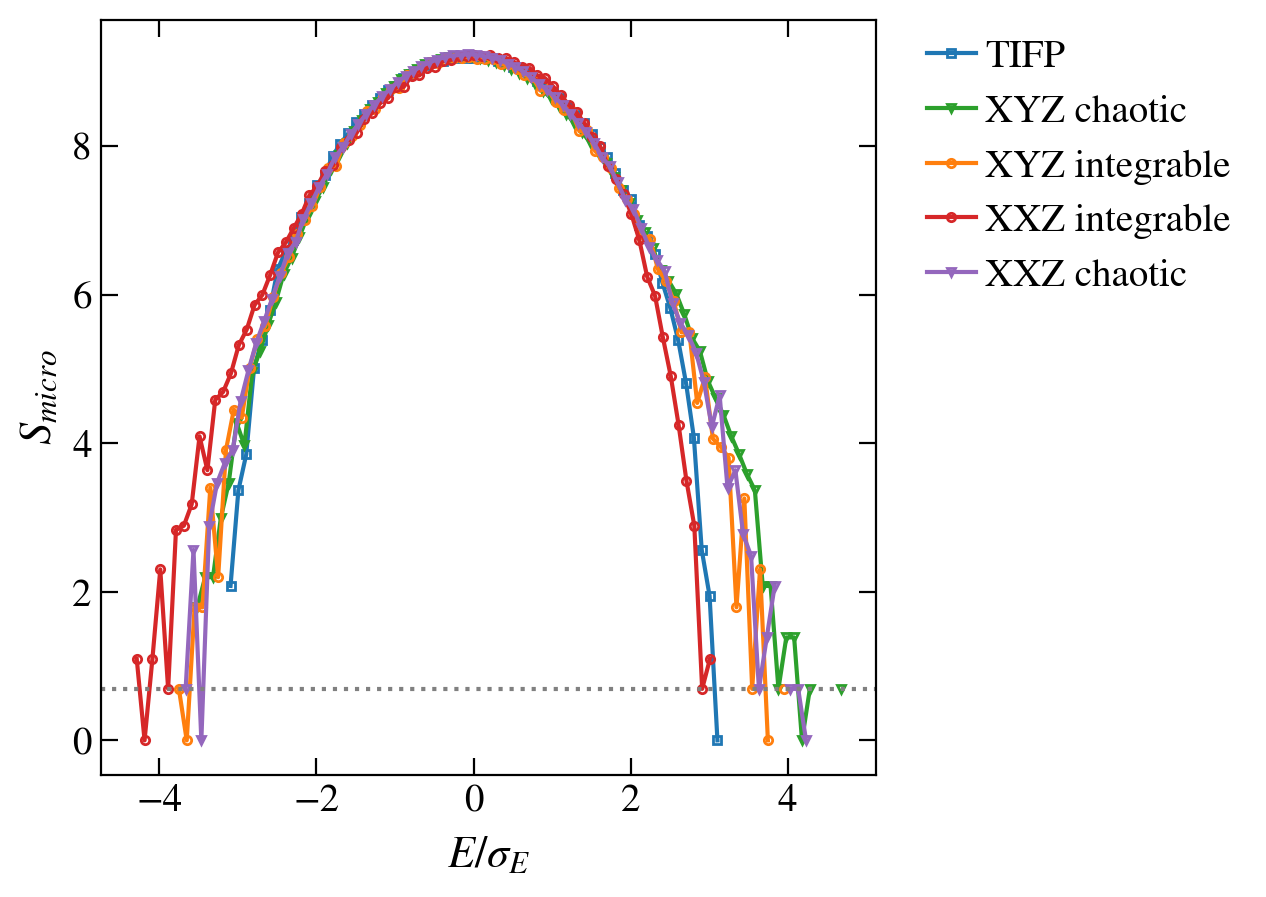

In [46]:
def microcanonical_entropy(energies, dE):
    Ex = np.arange(energies[0], energies[-1] + dE, dE)
    return Ex, np.log(np.array( [ ( (energies >= E) & (energies < E+dE) ).sum() for E in Ex] ))
    # return Ex, tools.remove_fluctuations(np.log(np.array( [ ( (energies >= E) & (energies < E+dE) ).sum() for E in Ex] )), 20)


L=18

J=0.8
c=0.9

zz=-1
z1=-1
z2=-1

LA = L//2
dE = 0.1


colors_ls_cyc = itertools.cycle(colors_ls)
betas = np.logspace(-1.5, 5, 100)

fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharey=True)

sects = get_sectors(L)

entropy_th = np.zeros((betas.size))

col = next(colors_ls_cyc)
dim_tot = 0
Etot = []
for [zz, z1, z2] in sects:
    
    name = base_dir + 'Entropy/Eigenstate/' + info(L=L, J=J, c=c, zz=zz, z1=z1, z2=z2, ext='.hdf5')
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('energies'))[0]
            dim = E.size
            dim_tot += dim
            Etot = [*Etot, *E]
            # S = np.array(file.get('entropy'))[LA] / page(LA, L-LA)
            
            # for ii_b, beta in enumerate(betas):
            #     ent = thermal_entropy(E, beta)
            #     entropy_th[ii_b] += ent * dim
            
    else:
        print(name)

# entropy_th /= dim_tot
# axis.plot(1./betas, entropy_th, marker='s', label='TIFP', color=col)

Etot = np.sort( np.array(Etot) )
Etot /= np.std(Etot)
# Etot = (2 * Etot - (np.max(Etot) + np.min(Etot))) / (np.max(Etot) - np.min(Etot))
E, Smicro = microcanonical_entropy(Etot, dE)
print(E.shape, Smicro.shape)
axis.plot(E, Smicro, marker='s', label='TIFP', color=col, markerfacecolor='None', markersize=3)

L=18
LA = L//2
J1=1
d1=0.1
e1=0.1
J2=2.0
d2=d1
e2=e1
real_sec, imag_sec = get_sectors_xx(L)
sects = real_sec + imag_sec

entropy_th_int = np.zeros((betas.size))
entropy_th_ch = np.zeros((betas.size))
dim_tot = 0
Etot_ch = []
Etot_int = []
col1 = next(colors_ls_cyc)
col2 = next(colors_ls_cyc)
for [ks, ps, zxs, zzs] in sects:
    
    name1 = '../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/' + info_sym(L=L, J1=J1, delta1=d1, eta1=e1, k=ks, p=ps, zx=zxs, zz=zzs) + ".hdf5"
    name2 = '../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/' + info_sym(L=L, J1=J1, J2=J2, delta1=d1, eta1=e1, delta2=d2, eta2=e2, k=ks, p=ps, zx=zxs, zz=zzs) + ".hdf5"
    if exists(name1) and exists(name2):
        with h5py.File(name1, "r") as file:
            Eint = np.array(file.get('energies'))[0] - L / 8 * (3+e1**2)
            dim = Eint.size
            dim_tot += dim
            Etot_int = [*Etot_int, *Eint] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot_int, *Eint, *Eint]
        
        with h5py.File(name2, "r") as file:
            Ech = np.array(file.get('energies'))[0]
            Etot_ch = [*Etot_ch, *Ech] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot_ch, *Ech, *Ech]
            
        # for ii_b, beta in enumerate(betas):
        #     entropy_th_int[ii_b] += thermal_entropy(Eint, beta) * dim
        #     entropy_th_ch[ii_b]  += thermal_entropy(Ech, beta) * dim
    else:
        print(name1)
        print(name2)

# entropy_th_int /= dim_tot
# entropy_th_ch /= dim_tot
# # print(entropy_th_ch - entropy_th_int)
# axis.plot(1./betas, entropy_th_int, marker='o', color=col1)
# axis.plot(1./betas, entropy_th_ch, marker='v', color=col2)

Etot_ch  = np.sort( np.array(Etot_ch))
Etot_int = np.sort( np.array(Etot_int))
Etot_ch /= np.std(Etot_ch)
Etot_int /= np.std(Etot_int)
# Etot_int = (2 * Etot_int - (np.max(Etot_int) + np.min(Etot_int))) / (np.max(Etot_int) - np.min(Etot_int))
# Etot_ch = (2 * Etot_ch - (np.max(Etot_ch) + np.min(Etot_ch))) / (np.max(Etot_ch) - np.min(Etot_ch))
E, Smicro = microcanonical_entropy(Etot_ch, dE)
axis.plot(E, Smicro, marker='v', label='XYZ chaotic', color=col2, markerfacecolor='None', markersize=3)
E, Smicro = microcanonical_entropy(Etot_int, dE)
axis.plot(E, Smicro, marker='o', label='XYZ integrable', color=col1, markerfacecolor='None', markersize=3)

# print(entropy_th_ch, entropy_th_int)
L=18
U1=L//2
Sz = U1 - L/2
LA = L//2
J1=1
d1=0.55
J2=2.0
d2=d1

entropy_th_int = np.zeros((betas.size))
entropy_th_ch = np.zeros((betas.size))
Etot_ch = []
Etot_int = []
col1 = next(colors_ls_cyc)
col2 = next(colors_ls_cyc)
for ii, d2 in enumerate([0.0, 0.55]):
    J2 = 2 if ii else 0
    dim_tot = 0
    Etot = []
    for U1 in range(1, L-1):
        Sz = U1 - L//2
        real_sec, imag_sec = get_sectors_xx(L, hx=0.1, hz=0 if U1 == L/2 else 0.1)
        sects = real_sec + imag_sec
        for [ks, ps, zxs, zzs] in sects:
            name = maks_data + f"SQ,PBC,d=1,Ns={L},Lx={L},Ly=1,Lz=1/" + info_maks(L=L, J1=J1, J2=J2, delta1=d1, delta2=d2, k=ks, p=ps, zx=zxs, zz=zzs, U1=U1) + ".h5"
            Ename = 'energy'
            sub_idx = 1
            if not exists(name):
                # print("Maks not found:", name)
                sub_idx = 0
                Ename = 'energies'
                name =  f"../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/" + info_xxz_sym(L=L, J1=1, J2=J2, delta1=d1, delta2=d2, hz=0.0, k=ks, p=ps, zx=zxs, Sz=Sz) + ".hdf5"
            if exists(name):
                with h5py.File(name, "r") as file:
                    E = np.array(file.get(Ename))
                    try:
                        E = E[0]
                        dim = E.size
                        dim_tot += dim
                        Etot = [*Etot, *E] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot, *E, *E]
                    except IndexError:
                        print("ERROR:", name, E)
                
                # for ii_b, beta in enumerate(betas):
                #     if ii == 0: entropy_th_int[ii_b] += thermal_entropy(Eint, beta) * dim
                #     else:       entropy_th_ch[ii_b]  += thermal_entropy(Ech, beta) * dim
            else:
                print(name)
    
    Etot = np.array(Etot)
    Etot /= np.std(Etot)
    print(Etot.size)
    # Etot = (2 * Etot - (np.max(Etot) + np.min(Etot))) / (np.max(Etot) - np.min(Etot))
    if ii == 0: Etot_int = np.sort(Etot)
    else:       Etot_ch = np.sort(Etot)
# entropy_th_int /= dim_tot
# entropy_th_ch /= dim_tot
# # print(entropy_th_ch - entropy_th_int)
# axis.plot(1./betas, entropy_th_int, marker='o', color=col1)
# axis.plot(1./betas, entropy_th_ch, marker='v', color=col2)
# print(Etot_int)
E, Smicro = microcanonical_entropy(Etot_int, dE)
axis.plot(E, Smicro, marker='o', label='XXZ integrable', color=col1, markerfacecolor='None', markersize=3)
E, Smicro = microcanonical_entropy(Etot_ch, dE)
axis.plot(E, Smicro, marker='v', label='XXZ chaotic', color=col2, markerfacecolor='None', markersize=3)

axis.axhline(y=np.log(2), ls=':', color='gray')
# axis.set_ylim(1e-10, 1)
fig_help.set_plot_elements(axis, ylabel=r"$S_{micro}$", xlabel=r"$E / \sigma_E$", font_size=14, set_legend=False)#, xscale='log', yscale='log')
fig_help.set_legend(axis, loc = 'upper left', fontsize=14, ncol=1, anchor=(1.02, 1.02))
# fig.subplots_adjust(wspace = 0.1, hspace=0.4)

fig.savefig("Fig_thermal_entropy.pdf", bbox_inches = 'tight', pad_inches=0.02)
fig.savefig("Fig_thermal_entropy.png", bbox_inches = 'tight', pad_inches=0.02)

../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/_L=22,J1=1,J2=2,d1=0.1,d2=0.1,e1=0.1,e2=0.1,hx=0,hz=0,k=9,zx=1,zz=1,edge=0.hdf5
22 4194304 4099072
(8186,) (8186,)
(7721,) (7721,)
(7800,) (7800,)
(8359,) (8359,)
(8359,) (8359,)
(7800,) (7800,)
(7721,) (7721,)
(8186,) (8186,)
(16079,) (16079,)
(15986,) (15986,)
(15986,) (15986,)
(16079,) (16079,)
(16079,) (16079,)
(15986,) (15986,)
(15986,) (15986,)
(16079,) (16079,)
(16079,) (16079,)
(15986,) (15986,)
(15986,) (15986,)
(16079,) (16079,)
(16079,) (16079,)
(15986,) (15986,)
(15986,) (15986,)
(16079,) (16079,)
(16079,) (16079,)
(15986,) (15986,)
(15986,) (15986,)
(16079,) (16079,)
705432 705432
22 4194304 705432
705432 705432


Text(0.5, 1.0, '$L=22$')

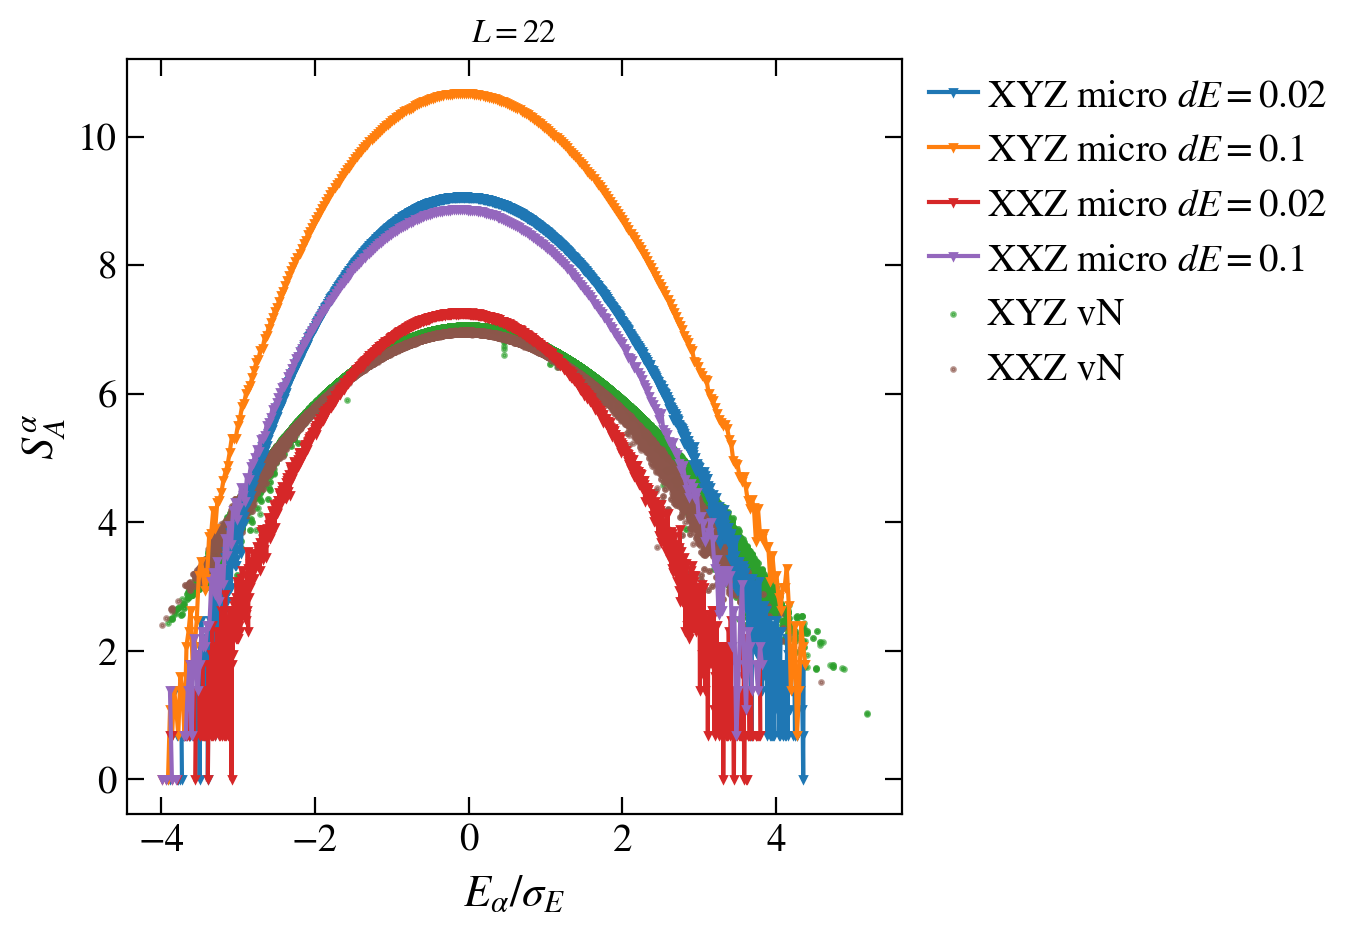

In [89]:
def microcanonical_entropy(energies, dE):
    Ex = np.arange(energies[0], energies[-1] + dE, dE)
    return Ex, np.log(np.array( [ ( (energies >= E) & (energies < E+dE) ).sum() for E in Ex] ))

L=22

J=0.8
c=0.9

zz=-1
z1=-1
z2=-1

LA = L//2

dE1 = 0.02
dE2 = 0.1

colors_ls_cyc = itertools.cycle(colors_ls)
fig, axis = plt.subplots( nrows=1, ncols=1, figsize=(5,5), dpi = 200, sharey=True)

# sects = get_sectors(L)
# Etot = []
# Stot = []
# dim_tot = 0
# for [zz, z1, z2] in sects:
    
#     name = base_dir + 'Entropy/Eigenstate/' + info(L=L, J=J, c=c, zz=zz, z1=z1, z2=z2, ext='.hdf5')
#     if exists(name):
#         with h5py.File(name, "r") as file:
#             E = np.array(file.get('energies'))[0]
#             dim_tot += E.size
#             S = np.array(file.get('entropy'))[LA]# / page(LA, L-LA)
#             Etot = [*Etot, *E]
#             Stot = [*Stot, *S]
            
#     else:
#         print(name)
# print(L, 2**L, dim_tot)
# Etot = np.array(Etot)
# Etot = (2 * Etot - (np.max(Etot) + np.min(Etot))) / (np.max(Etot) - np.min(Etot))
# Stot = np.array(Stot)
# axis.scatter(Etot, Stot, s=2, label='TIFP', zorder=5, alpha=0.6)

LA = L//2
J1=1
J2=2
d1=0.1
e1=0.1
real_sec, imag_sec = get_sectors_xx(L)
sects = real_sec + imag_sec
Etot = []
Stot = []
dim_tot = 0
for [ks, ps, zxs, zzs] in sects:
    
    name = '../../XYZ/results/symmetries/PBC/Entropy/Eigenstate/' + info_sym(L=L, J1=J1, J2=J2, delta1=d1, eta1=e1, delta2=d1, eta2=e1, k=ks, p=ps, zx=zxs, zz=zzs) + ".hdf5"
    if exists(name):
        with h5py.File(name, "r") as file:
            E = np.array(file.get('energies'))[0]
            dim_tot += E.size * (1 if ks == 0 or (ks == L // 2 and L%2==0) else 2)
            S = np.array(file.get('entropy'))[LA]# / page(LA, L-LA)
            Etot = [*Etot, *E] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot, *E, *E]
            Stot = [*Stot, *S] if ks == 0 or (ks == L // 2 and L%2==0) else [*Stot, *S, *S]
            
    else:
        print(name)
print(L, 2**L, dim_tot)
Etot = np.array(Etot)
# Etot = (2 * Etot - (np.max(Etot) + np.min(Etot))) / (np.max(Etot) - np.min(Etot))
E, Smicro = microcanonical_entropy(Etot, dE1)
axis.plot(E / np.std(Etot), Smicro, marker='v', label=r'XYZ micro $dE=%g$'%dE1, markersize=2, color=next(colors_ls_cyc))
E, Smicro = microcanonical_entropy(Etot, dE2)
axis.plot(E / np.std(Etot), Smicro, marker='v', label=r'XYZ micro $dE=%g$'%dE2, markersize=2, color=next(colors_ls_cyc))
Etot /= np.std(Etot)
Stot = np.array(Stot)
axis.scatter(Etot, Stot, s=2, label='XYZ vN', zorder=0, alpha=0.6, color=next(colors_ls_cyc))


U1=L//2
LA = L//2
J1=1
d1=0.55
J2=2.0
d2=d1

Etot = []
Stot = []
dim_tot = 0
# for U1 in range(0, L):
for U1 in [L//2]:
    Sz = U1 - L/2
    real_sec, imag_sec = get_sectors_xx(L, hx=0.1, hz=0 if U1 == L/2 else 0.1)
    sects = real_sec + imag_sec
    for [ks, ps, zxs, zzs] in sects:
        name = maks_data + f"SQ,PBC,d=1,Ns={L},Lx={L},Ly=1,Lz=1/" + info_maks(L=L, J1=J1, J2=J2, delta1=d1, delta2=d1, k=ks, p=ps, zx=zxs, zz=zzs, U1=U1) + ".h5"
        Ename = 'energy'
        sub_idx = 1
        if not exists(name):
            # print("Maks not found:", name)
            sub_idx = 0
            Ename = 'energies'
            name =  f"../../XXZ/results/symmetries/PBC/Entropy/Eigenstate/" + info_xxz_sym(L=L, J1=1, J2=J2, delta1=d1, delta2=d1, hz=0.0, k=ks, p=ps, zx=zxs, Sz=Sz) + ".hdf5"
        if exists(name):
            with h5py.File(name, "r") as file:
                E = np.array(file.get(Ename))
                try:
                    E = E[0]
                    dim_tot += E.size * (1 if ks == 0 or (ks == L // 2 and L%2==0) else 2)
                    S = np.transpose(np.array(file.get('entropy'))) if J2 == 0 else (np.array(file.get('entropy')))
                    # print(S.shape)
                    S = S[LA-sub_idx]# / page(LA, L-LA)
                    print(E.shape, S.shape)
                    Etot = [*Etot, *E] if ks == 0 or (ks == L // 2 and L%2==0) else [*Etot, *E, *E]
                    Stot = [*Stot, *S] if ks == 0 or (ks == L // 2 and L%2==0) else [*Stot, *S, *S]
                except IndexError:
                        print("ERROR:", name, E)
        else:
            print(name)

print(len(Etot), len(Stot))
print(L, 2**L, dim_tot)
Etot = np.array(Etot)
Stot = np.array(Stot)
E, Smicro = microcanonical_entropy(Etot, dE1)
axis.plot(E / np.std(Etot), Smicro, marker='v', label=r'XXZ micro $dE=%g$'%dE1, markersize=2, color=next(colors_ls_cyc))
E, Smicro = microcanonical_entropy(Etot, dE2)
axis.plot(E / np.std(Etot), Smicro, marker='v', label=r'XXZ micro $dE=%g$'%dE2, markersize=2, color=next(colors_ls_cyc))

Etot = Etot / np.std(Etot)
print(Etot.size, Stot.size)
axis.scatter(Etot, Stot, s=2, label='XXZ vN', zorder=0, alpha=0.6, color=next(colors_ls_cyc))

# axis.set_ylim(None, 1)
fig_help.set_plot_elements(axis, ylabel=r"$S_A^\alpha$", xlabel=r"$E_\alpha/\sigma_E$", font_size=14, set_legend=False)
fig_help.set_legend(axis, loc = 'upper left', fontsize=14, ncol=1, anchor=(0.99, 1.02))
fig.subplots_adjust(wspace = 0.1, hspace=0.4)
axis.set_title(r"$L=%d$"%L)